# Исследование объявлений о продаже квартир

По имеющимся у нас архивным данным сервиса по сделкам с недвижимостью в Санкт-Петербурге и соседних населённых пунктах за несколько лет нужно научиться определять рыночную стоимость объектов недвижимости. Для этого нужно установить параметры, которые позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

Нам доступны два вида данных по каждой квартире - данные, вписанные пользователем сервиса, а также данные, полученые автоматически на основе картографических данных - такие как расстояние до центра, аэропорта, ближайшего парка и водоёма и др.

# Описание данных
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении


### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('D:/Яндекс Практикум/3. Исследовательский анализ данных/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Исследуем стиль названия столбцов и исправляем некоторые.

In [5]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest',
    'ponds_around3000': 'ponds_around_3000',
    'parks_around3000': 'parks_around_3000'
}) 

Проверяем исправления.

In [7]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Строим общую гистограмму для всех числовых столбцов таблицы. 

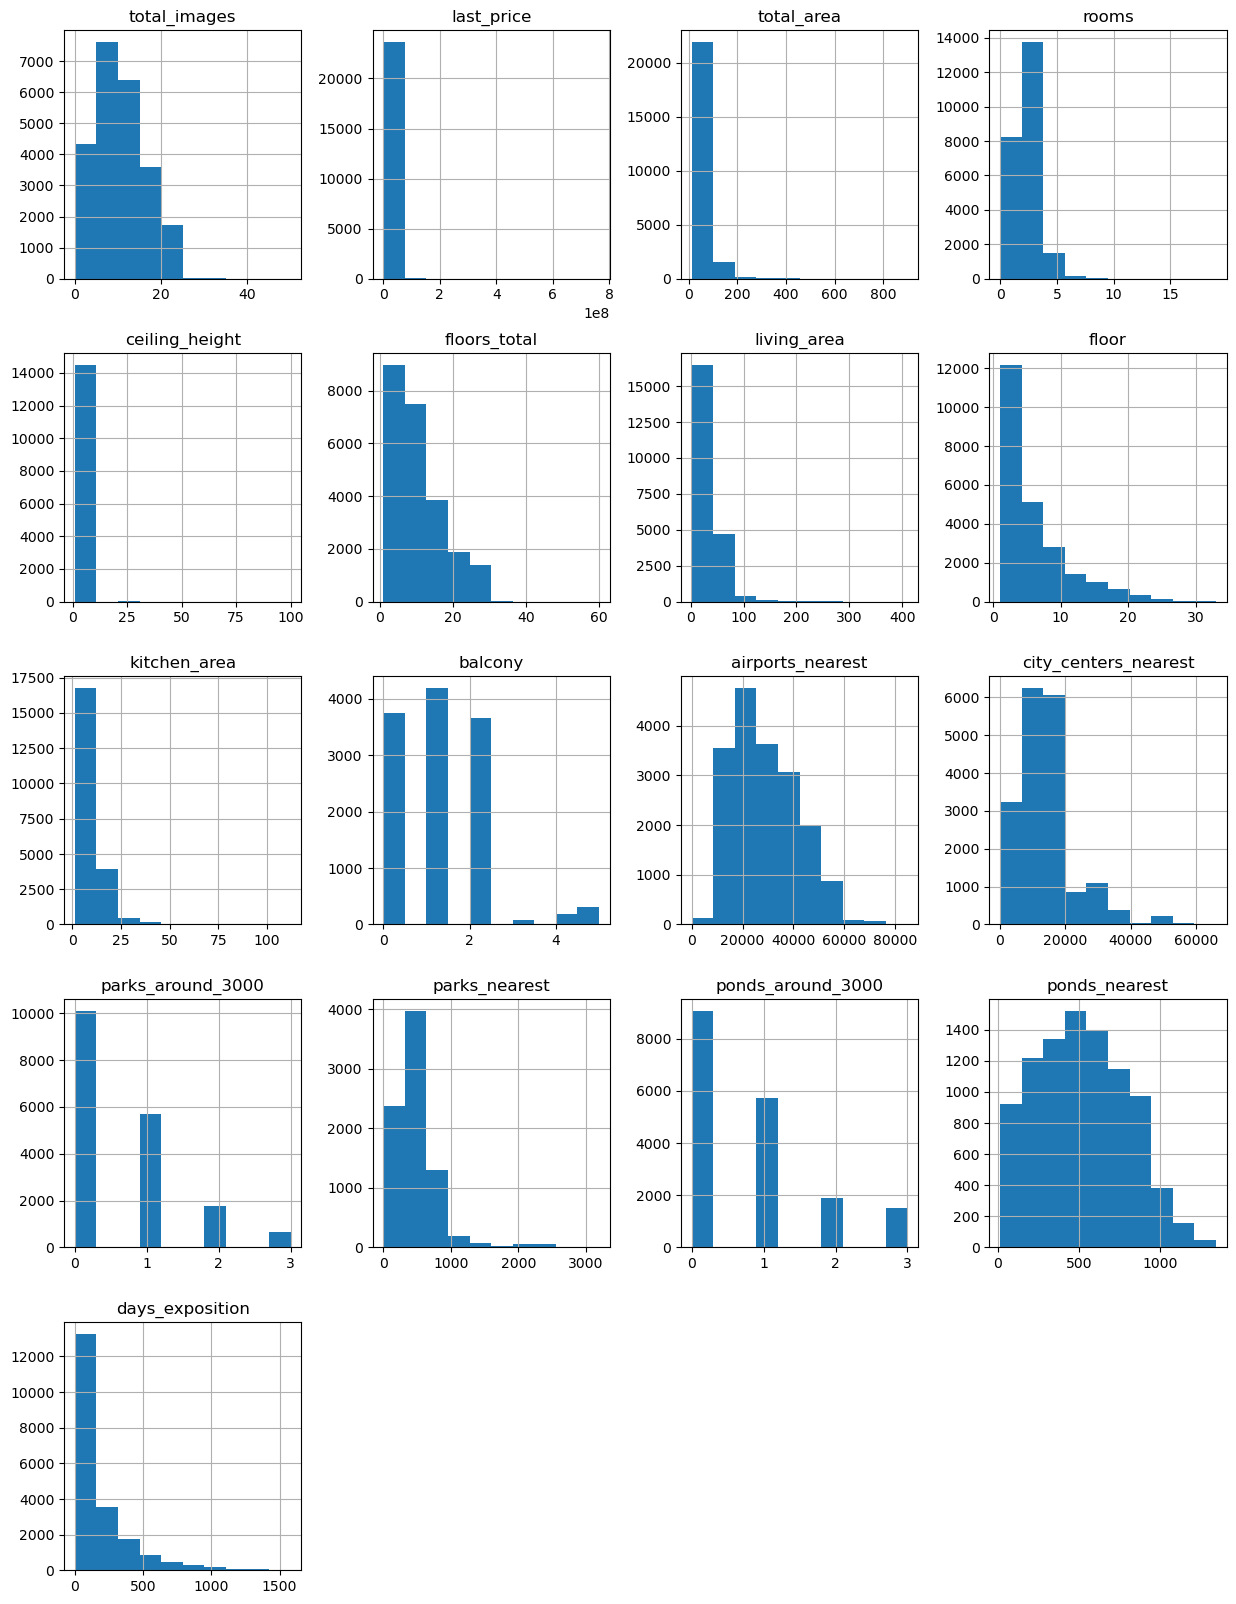

In [8]:
data.hist(figsize=(15, 20));

Изучив первую информацию, видно, что в 14-и из 22-х столбцов есть пропуски. Дубликатов столбцов нет. Тип даных в некоторых столбцах нужно поменять с вещественного нацелочисленный. Названия некоторых столбцов с неаккуратным стилем исправили.

### Предобработка данных

#### Определяем количество пропущенных значений в каждом столбце и исправляем где необходимо.

In [9]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Из этой нформации о датафрейме видно, что в 14-и из 22-х столбцов есть пропуски. В некоторых столбцах их совсем мало, в некоторых - очень много. Изучив информацию о каждом столбце, применяем наиболее подходящий способ заполнения пропусков. Аномальные значения или удаляем, или исправляем.

##### Исследуем столбец "высота потолков" ('ceiling_height')

In [10]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [11]:
data['ceiling_height'].sort_values(ascending=False)

22869    100.0
22336     32.0
3148      32.0
21377     27.5
20478     27.0
         ...  
23687      NaN
23690      NaN
23692      NaN
23695      NaN
23696      NaN
Name: ceiling_height, Length: 23699, dtype: float64

In [12]:
9195 / 23699 * 100

38.799105447487236

В этом столбце 39% пропущеных значений, слишком много, чтобы их игнорировать. В некоторых значениях, например 27.5, 25., скорее всего неправильно поставлена запятая, исправляем. Остальные значения, которые совсем маловероятны, исправляем на медианное значение, как и пропущенные значения.

In [13]:
data['ceiling_height'].median()

2.65

In [14]:
data['ceiling_height'] = data['ceiling_height'].replace([27.5, 32, 27, 26, 22.6, 24, 25], 
                                                        [2.75, 3.2, 2.7, 2.6, 2.6, 2.4, 2.5])

In [15]:
data.loc[(data['ceiling_height'] > 5), 'ceiling_height'] = 2.65
data.loc[(data['ceiling_height'] < 2.2), 'ceiling_height'] = 2.65

In [16]:
data['ceiling_height'].unique()

array([2.7 ,  nan, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57,
       4.15, 3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 ,
       3.06, 2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66,
       2.59, 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62,
       3.12, 2.53, 2.74, 2.96, 2.46, 5.  , 2.79, 2.95, 4.06, 2.94, 3.82,
       3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 3.65, 3.9 , 3.18, 3.35,
       2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52, 3.95, 3.75,
       2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24, 4.8 , 4.5 , 4.2 ,
       3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26, 3.34, 2.81, 3.44, 2.97,
       3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93, 3.46, 3.47, 3.33, 3.63,
       3.32, 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04, 4.45, 3.84, 3.23, 3.02,
       3.21, 3.43, 3.78, 4.3 , 3.39, 2.69, 3.31, 4.65, 3.56, 2.2 , 3.51,
       3.93, 3.42, 2.99, 3.49, 4.14, 2.91, 3.88, 4.

In [17]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)

In [18]:
data['ceiling_height'].sort_values(ascending=False)

1053     5.00
21923    4.90
2802     4.80
19142    4.70
1300     4.70
         ... 
23498    2.30
1582     2.30
5498     2.30
17794    2.25
12755    2.20
Name: ceiling_height, Length: 23699, dtype: float64

In [19]:
data.isna().sum ()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

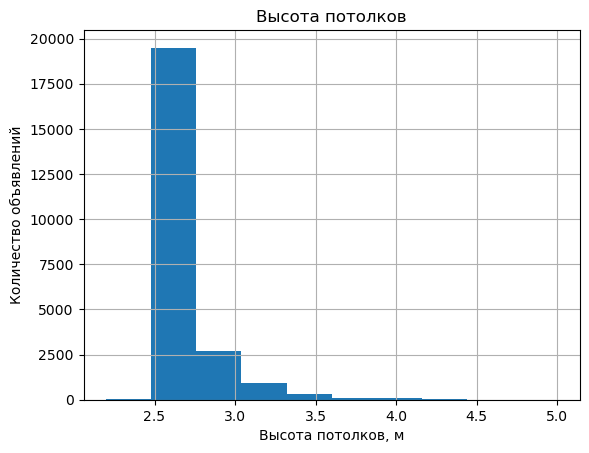

In [20]:
data['ceiling_height'].hist()
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество объявлений')
plt.title('Высота потолков')
plt.show()

##### Исследуем столбец "всего этажей" ('floors_total').

In [21]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [22]:
86 / 23699 * 100

0.36288450989493226

Здесь пропущенных значений здесь всего около 0,4%. Заменяем пропуски значением столбца 'floor' соответствующей строки. Тип данных столбца меняем на int, так как количество этажей меряют целыми числами.

In [23]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])

In [24]:
data['floors_total'] = data['floors_total'].astype('int')

In [25]:
data['floors_total'].sort_values(ascending=False)

2253     60
16731    52
16934    37
5807     36
11079    36
         ..
16444     1
17744     1
11641     1
22841     1
3076      1
Name: floors_total, Length: 23699, dtype: int32

In [26]:
data.isna().sum ()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

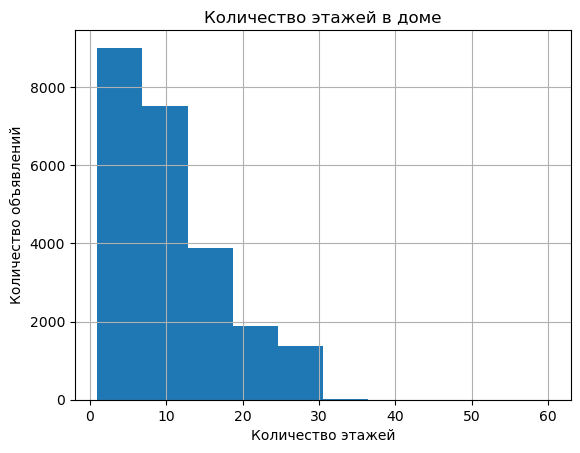

In [27]:
data['floors_total'].hist()
plt.xlabel('Количество этажей')
plt.ylabel('Количество объявлений')
plt.title('Количество этажей в доме')
plt.show()

Большинство домов имеют 5 и 9 этажей. Выше тридцати этажей домов мало. Аномалий не выявлено.

##### Исследуем столбец "жилая площадь" ('living_area').

In [28]:
1903 / 23699 * 100

8.029874678256467

In [29]:
data['living_area'].unique()

array([51.  , 18.6 , 34.3 , ..., 31.65, 13.59, 42.55])

In [30]:
data['living_area'].sort_values(ascending=False)

19540    409.7
5358     409.0
12401    347.5
4237     332.0
12859    322.3
         ...  
23642      NaN
23663      NaN
23670      NaN
23679      NaN
23697      NaN
Name: living_area, Length: 23699, dtype: float64

Доля пропущенных значений в этом столбце 8%. Пропуски заполняем результатом деления общей площади соответствующей строки на коэффициент. Коэффициент получаем делением средней общей площади всех объектов на среднюю жилую площадь всех объектов. Меняем тип данных на int.

In [31]:
k_living = data['total_area'].mean() / data['living_area'].mean()

In [32]:
k_living

1.751375861996321

In [33]:
data['living_area'] = data['living_area'].fillna(data['total_area'] / k_living)

In [34]:
data['living_area'] = data['living_area'].astype('int')

In [35]:
data['living_area'].sort_values(ascending=False)

5358     409
19540    409
3117     360
12401    347
4237     332
        ... 
21943      5
3242       3
23574      3
13915      2
21758      2
Name: living_area, Length: 23699, dtype: int32

In [36]:
data.isna().sum ()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

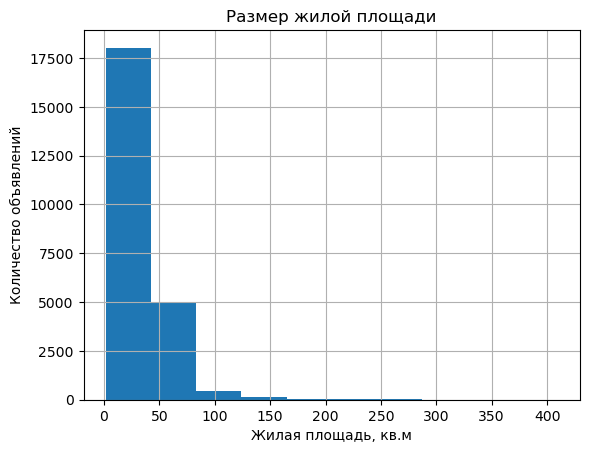

In [37]:
data['living_area'].hist()
plt.xlabel('Жилая площадь, кв.м')
plt.ylabel('Количество объявлений')
plt.title('Размер жилой площади')
plt.show()

Большинство квартир имеют жилую площадь до 40 м2, несмотря на очень маленькие и высокие значения, выбивающихся значений нет.

##### Исследуем столбец "площадь кухни" ('kitchen_area').

In [38]:
2278 / 23699 *100

9.612219924891345

In [39]:
data['kitchen_area'].unique()

array([ 25.  ,  11.  ,   8.3 ,    nan,  41.  ,   9.1 ,  14.4 ,  18.9 ,
         8.81,   6.5 ,   8.5 ,   6.  ,   9.  ,   5.2 ,   8.  ,   7.6 ,
         5.6 ,  12.  ,   5.7 ,   6.1 ,  19.6 ,  15.  ,   7.  ,   9.2 ,
        11.7 ,  13.4 ,  17.  ,   6.3 ,  11.6 ,   8.8 ,  10.  ,  17.6 ,
         7.5 ,   9.5 ,  50.  ,  15.5 ,  10.7 ,  11.1 ,  20.  ,  11.9 ,
        16.  ,   5.3 ,  11.5 ,   7.2 ,   6.2 ,  10.4 ,   7.1 ,   4.9 ,
         7.3 ,  11.95,  10.2 ,   6.4 ,   5.5 ,  13.  ,   8.4 ,  23.6 ,
        10.8 ,  18.3 ,   5.  ,   8.2 ,  24.  ,  23.8 ,   6.6 ,  26.85,
        15.4 ,   7.8 ,  33.8 ,   5.4 ,  12.72,  12.2 ,  19.  ,  12.4 ,
         7.9 ,  10.3 ,   9.8 ,  17.5 ,  14.7 ,  20.91,  21.3 ,  10.6 ,
        10.9 ,   9.7 ,   7.7 ,  12.5 ,  11.4 ,   8.6 ,  11.24,  14.1 ,
        15.7 ,  13.29,  14.  ,  12.9 ,  12.7 ,  16.5 ,   9.36,  21.5 ,
        35.  ,  10.5 ,   8.7 ,  19.3 ,  21.4 ,  40.  ,  49.2 ,  11.52,
         8.9 ,   9.6 ,  30.  ,  14.2 ,   8.1 ,  10.44,   4.5 ,  16.3 ,
      

In [40]:
data['kitchen_area'].sort_values(ascending=False)

19540    112.0
20215    107.0
2489     100.7
5358     100.0
16239     93.2
         ...  
23655      NaN
23663      NaN
23670      NaN
23679      NaN
23696      NaN
Name: kitchen_area, Length: 23699, dtype: float64

В этом столбце пропусков около 10%. Заполняем их методом аналогичным столбцу "жилая площадь". Меняем тип данных на int.

In [41]:
k_kitchen = data['total_area'].mean() / data['kitchen_area'].mean()

In [42]:
k_kitchen

5.709531864143031

In [43]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] / k_kitchen)

In [44]:
data['kitchen_area'] = data['living_area'].astype('int')

In [45]:
data['kitchen_area'].sort_values(ascending=False)

5358     409
19540    409
3117     360
12401    347
4237     332
        ... 
21943      5
3242       3
23574      3
13915      2
21758      2
Name: kitchen_area, Length: 23699, dtype: int32

In [46]:
data.isna().sum ()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

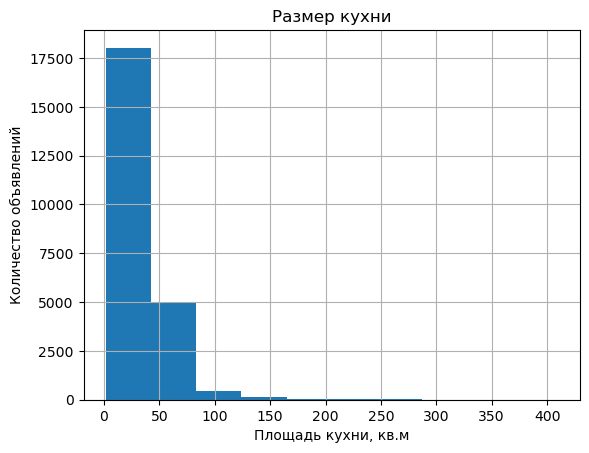

In [47]:
data['kitchen_area'].hist()
plt.xlabel('Площадь кухни, кв.м')
plt.ylabel('Количество объявлений')
plt.title('Размер кухни')
plt.show()

Абсолютное большинство кухонь имеют площадь до 10 м2, минимальные и максимальные значения не выбиваются из общей картины. Можно отметить схожесть гистограмм общей площади, жилой площади и площади кухни.

##### Исследуем столбец "сколько дней было размещено объявление" ('days_exposition').

In [48]:
3181 / 23699 * 100

13.422507278788135

In [49]:
data['days_exposition'].unique()

array([  nan,   81.,  558., ..., 1360., 1007.,  971.])

Здесь пропусков 13%. Делаем вывод, что квартира не продана. Пропущенные значения оставляем.

In [50]:
data['days_exposition'].sort_values(ascending=False)

18843    1580.0
1109     1572.0
9553     1553.0
1885     1513.0
20969    1512.0
          ...  
23684       NaN
23685       NaN
23694       NaN
23696       NaN
23698       NaN
Name: days_exposition, Length: 23699, dtype: float64

In [51]:
data.isna().sum ()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

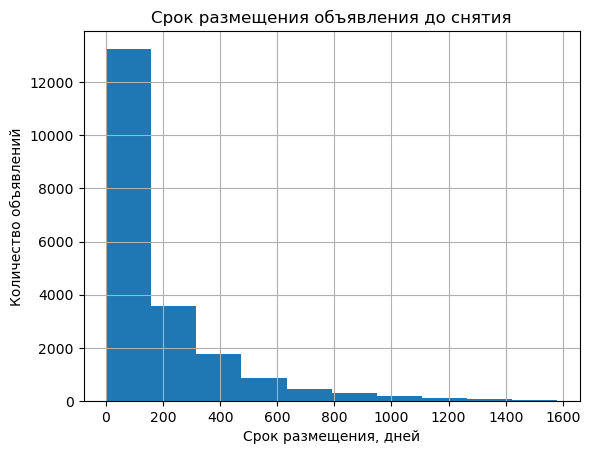

In [52]:
data['days_exposition'].hist()
plt.xlabel('Срок размещения, дней')
plt.ylabel('Количество объявлений')
plt.title('Срок размещения объявления до снятия')
plt.show()

##### Исследуем столбец "апартаменты" ('is_apartment').

In [53]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [54]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [55]:
20924 / 23699 * 100

88.2906451749019

Со столбцом "апартаменты" ('is_apartment') поступим по-другому, так как это булев тип. Будем считать, что пропуски, хотя их очень много - 88%, в этом столбце означают отицательный ответ, т.е. "False". Поэтому заполняем соответтственно пропуски. Заодно поменяется тип данных из 'object' в 'bool'.

In [56]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [57]:
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [58]:
data.isna().sum ()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [59]:
data['is_apartment'].unique()

array([False,  True])

##### Исследуем столбец "число балконов" ('balcony').

In [60]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [61]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [62]:
11519 / 23699 * 100

48.605426389299126

В столбце "число балконов" ('balcony') пропуски в 48% данных. Будем считать, что эту графу не заполнили только те, у кого нет балконов, ставим количество - 0. Тип данных столбца меняем на int, так как количество балконов меряют целыми числами.

In [63]:
data['balcony'] = data['balcony'].fillna(0)

In [64]:
data['balcony'] = data['balcony'].astype('int')

In [65]:
data.isna().sum ()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

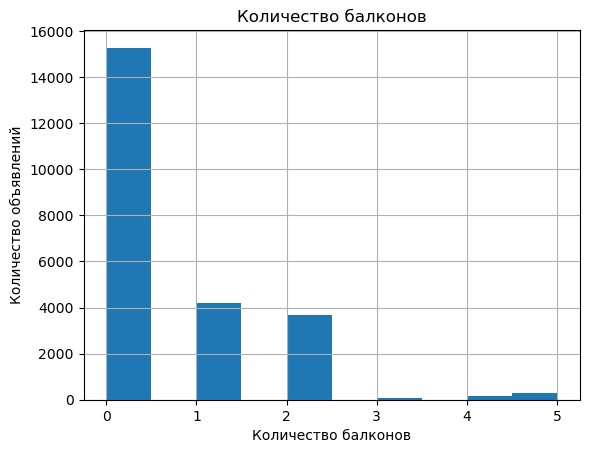

In [66]:
data['balcony'].hist()
plt.xlabel('Количество балконов')
plt.ylabel('Количество объявлений')
plt.title('Количество балконов')
plt.show()

##### Изучаем столбец "расстояние до ближайшего аэропорта в метрах (м)" ('airports_nearest').

In [67]:
data['airports_nearest'].unique()

array([18863., 12817., 21741., ..., 11751., 20151., 24665.])

In [68]:
data['airports_nearest'].value_counts()

37434.0    61
21928.0    32
44870.0    30
39946.0    30
18732.0    27
           ..
32366.0     1
13024.0     1
52394.0     1
20007.0     1
24665.0     1
Name: airports_nearest, Length: 8275, dtype: int64

In [69]:
data['airports_nearest'].sort_values(ascending=False)

9640     84869.0
5340     84853.0
577      84665.0
20746    84006.0
5218     83758.0
          ...   
23683        NaN
23692        NaN
23695        NaN
23696        NaN
23698        NaN
Name: airports_nearest, Length: 23699, dtype: float64

In [70]:
5542 / 23699 * 100

23.384952951601335

В столбце "расстояние до ближайшего аэропорта в метрах (м)" ('airports_nearest') 23% пропусков. Пропусков много, оставляем пропуски, иначе это может негативно повлиять на результат анализа. Других аномалий не обнаружено. Переводим данные в столбце в тип int.

In [71]:
data['airports_nearest'] = data['airports_nearest'].astype('Int64')

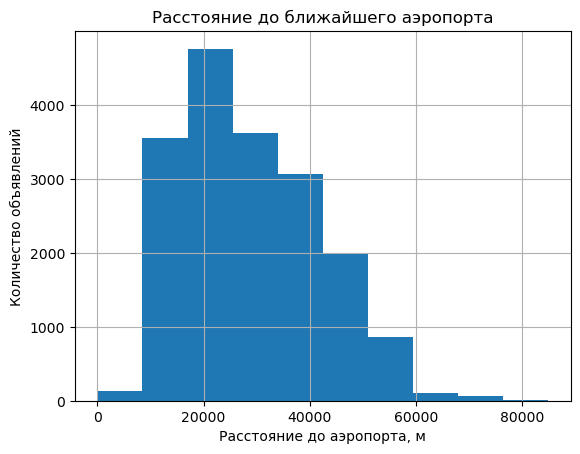

In [72]:
data['airports_nearest'].hist()
plt.xlabel('Расстояние до аэропорта, м')
plt.ylabel('Количество объявлений')
plt.title('Расстояние до ближайшего аэропорта')
plt.show()

##### Исследуем столбец "расстояние до центра города (м)" ('city_centers_nearest').

In [73]:
data['city_centers_nearest'].unique()

array([16028., 18603., 13933., ..., 27977.,  7262.,  6263.])

In [74]:
data['city_centers_nearest'].value_counts()

8460.0     61
20802.0    32
10720.0    30
20444.0    27
8434.0     27
           ..
16631.0     1
24311.0     1
15782.0     1
11940.0     1
6263.0      1
Name: city_centers_nearest, Length: 7642, dtype: int64

In [75]:
data['city_centers_nearest'].sort_values(ascending=False)

9640     65968.0
5340     65952.0
577      65764.0
20746    65105.0
5218     64857.0
          ...   
23683        NaN
23692        NaN
23695        NaN
23696        NaN
23698        NaN
Name: city_centers_nearest, Length: 23699, dtype: float64

In [76]:
5519 / 23699 * 100

23.28790244314106

В столбце "расстояние до центра города (м)" ('city_centers_nearest') 23% пропусков. Пропусков много, оставляем пропуски, иначе это может негативно повлиять на результат анализа. Переводим данные в столбце в тип int.

In [77]:
data['city_centers_nearest'] = data['city_centers_nearest'].astype('Int64')

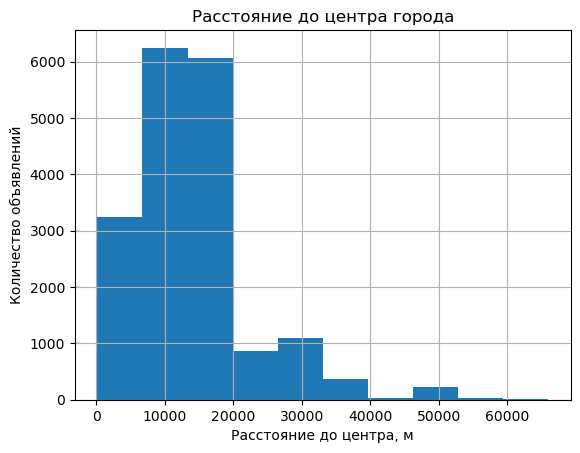

In [78]:
data['city_centers_nearest'].hist()
plt.xlabel('Расстояние до центра, м')
plt.ylabel('Количество объявлений')
plt.title('Расстояние до центра города')
plt.show()

##### Исследуем столбец "число парков в радиусе 3 км" ('parks_around_3000').

In [79]:
data['parks_around_3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [80]:
data['parks_around_3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around_3000, dtype: int64

In [81]:
5518 / 23699 * 100

23.2836828558167

В столбце "число парков в радиусе 3 км" ('parks_around_3000') 23% пропусков. Пропусков много, оставляем пропуски, иначе это может негативно повлиять на результат анализа. Переводим данные в столбце в тип int.

In [82]:
data['parks_around_3000'] = data['parks_around_3000'].astype('Int64')

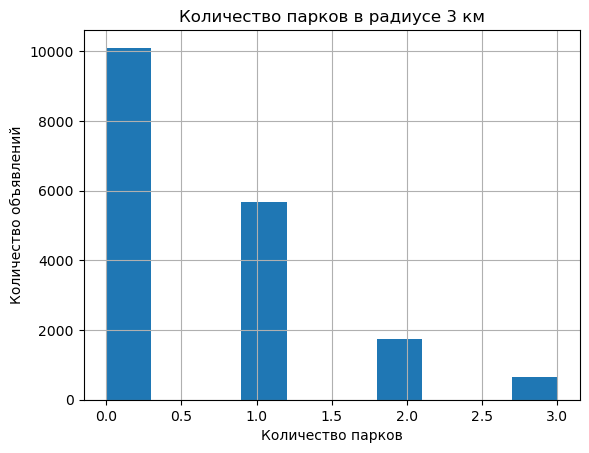

In [83]:
data['parks_around_3000'].hist()
plt.xlabel('Количество парков')
plt.ylabel('Количество объявлений')
plt.title('Количество парков в радиусе 3 км')
plt.show()

##### Исследуем столбец "расстояние до ближайшего парка (м)" ('parks_nearest').

In [84]:
data['parks_nearest'].unique()

array([4.820e+02,       nan, 9.000e+01, 8.400e+01, 1.120e+02, 3.100e+02,
       2.940e+02, 5.900e+02, 4.200e+02, 7.590e+02, 2.480e+02, 5.170e+02,
       4.110e+02, 4.520e+02, 5.320e+02, 4.590e+02, 7.250e+02, 4.700e+01,
       6.200e+02, 6.750e+02, 5.310e+02, 5.260e+02, 2.710e+02, 3.630e+02,
       6.480e+02, 3.820e+02, 3.340e+02, 1.670e+02, 4.450e+02, 2.310e+02,
       5.110e+02, 7.510e+02, 6.660e+02, 3.840e+02, 1.270e+02, 2.410e+02,
       4.880e+02, 1.560e+02, 5.760e+02, 2.850e+02, 6.330e+02, 1.500e+01,
       2.150e+02, 5.330e+02, 1.410e+02, 3.660e+02, 3.410e+02, 5.890e+02,
       3.440e+02, 5.080e+02, 4.170e+02, 7.620e+02, 4.410e+02, 5.590e+02,
       7.490e+02, 1.230e+02, 5.010e+02, 1.000e+01, 1.133e+03, 1.205e+03,
       5.160e+02, 8.600e+02, 2.760e+02, 9.800e+02, 4.630e+02, 5.910e+02,
       2.390e+02, 6.510e+02, 1.021e+03, 4.850e+02, 5.860e+02, 3.700e+02,
       6.880e+02, 2.750e+02, 5.460e+02, 4.660e+02, 1.390e+02, 2.510e+02,
       5.370e+02, 6.270e+02, 1.040e+02, 4.500e+02, 

In [85]:
data['parks_nearest'].value_counts()

441.0     67
173.0     41
392.0     41
456.0     40
471.0     32
          ..
3.0        1
2847.0     1
1443.0     1
7.0        1
2984.0     1
Name: parks_nearest, Length: 995, dtype: int64

In [86]:
data['parks_nearest'].sort_values(ascending=False)

10959    3190.0
19430    3190.0
1590     3064.0
19208    3013.0
23080    2984.0
          ...  
23691       NaN
23692       NaN
23695       NaN
23696       NaN
23698       NaN
Name: parks_nearest, Length: 23699, dtype: float64

In [87]:
15620 / 23699 * 100

65.90995400649817

В столбце "расстояние до ближайшего парка (м)" ('parks_nearest') 66% пропусков. Пропусков много, оставляем пропуски, иначе это может негативно повлиять на результат анализа. Переводим данные в столбце в тип int.

In [88]:
data['parks_nearest'] = data['parks_nearest'].astype('Int64')

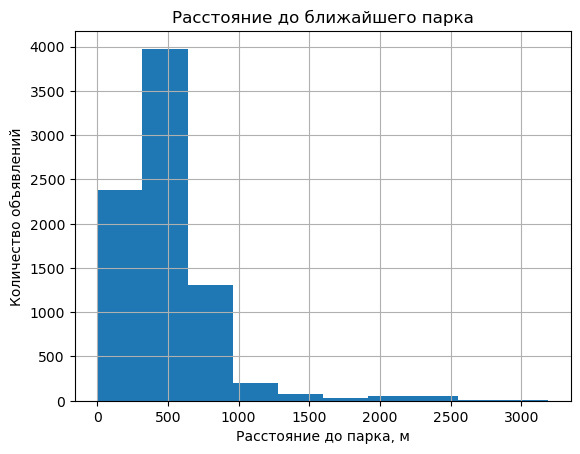

In [89]:
data['parks_nearest'].hist()
plt.xlabel('Расстояние до парка, м')
plt.ylabel('Количество объявлений')
plt.title('Расстояние до ближайшего парка')
plt.show()

##### Исследуем столбец "число водоёмов в радиусе 3 км" ('ponds_around_3000').

In [90]:
data['ponds_around_3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

In [91]:
data['ponds_around_3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around_3000, dtype: int64

In [92]:
data['ponds_around_3000'].sort_values(ascending=False)

23697    3.0
13391    3.0
2211     3.0
13271    3.0
13277    3.0
        ... 
23683    NaN
23692    NaN
23695    NaN
23696    NaN
23698    NaN
Name: ponds_around_3000, Length: 23699, dtype: float64

In [93]:
5518 / 23699 * 100

23.2836828558167

В столбце "число водоёмов в радиусе 3 км" ('ponds_around_3000') 23% пропусков. Пропусков много, оставляем пропуски, иначе это может негативно повлиять на результат анализа. Переводим данные в столбце в тип int.

In [94]:
data['ponds_around_3000'] = data['ponds_around_3000'].astype('Int64')

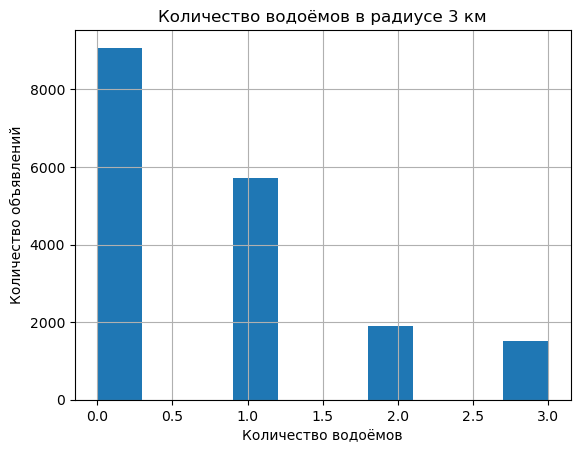

In [95]:
data['ponds_around_3000'].hist()
plt.xlabel('Количество водоёмов')
plt.ylabel('Количество объявлений')
plt.title('Количество водоёмов в радиусе 3 км')
plt.show()

##### Исследуем столбец "расстояние до ближайшего водоёма (м)" ('ponds_nearest').

In [96]:
data['ponds_nearest'].unique()

array([ 755.,   nan,  574., ...,  959.,   40., 1134.])

In [97]:
data['ponds_nearest'].value_counts()

427.0     70
454.0     41
153.0     40
433.0     39
474.0     37
          ..
150.0      1
967.0      1
131.0      1
1164.0     1
1134.0     1
Name: ponds_nearest, Length: 1096, dtype: int64

In [98]:
data['ponds_nearest'].sort_values(ascending=False)

20726    1344.0
19924    1341.0
19138    1341.0
1476     1337.0
12054    1313.0
          ...  
23690       NaN
23692       NaN
23695       NaN
23696       NaN
23698       NaN
Name: ponds_nearest, Length: 23699, dtype: float64

In [99]:
14589 / 23699 * 100

61.55955947508333

В столбце "расстояние до ближайшего водоёма (м)" ('ponds_nearest') почти 62% пропусков. Пропусков много, оставляем пропуски, иначе это может негативно повлиять на результат анализа. Переводим данные в столбце в тип int.

In [100]:
data['ponds_nearest'] = data['ponds_nearest'].astype('Int64')

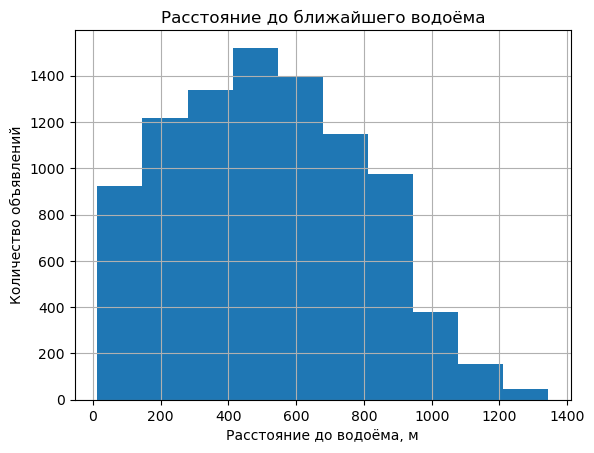

In [101]:
data['ponds_nearest'].hist()
plt.xlabel('Расстояние до водоёма, м')
plt.ylabel('Количество объявлений')
plt.title('Расстояние до ближайшего водоёма')
plt.show()

##### Поверяем таблицу на наличие явных дубликатов.

In [102]:
data.duplicated().sum()

0

Явных дубликатов не обнаружено.

##### Изучаем столбец "название населённого пункта" ('locality_name').

In [103]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [104]:
data['locality_name'].value_counts()

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

При исследовании списка населенных пунктов на неявные дубликаты обнаружили 50 неявных дубликатов. Очищаем от них таблицу используя метод replace().

In [105]:
data = data.replace({'поселок Рябово': 'посёлок Рябово', 
    'поселок городского типа Рябово': 'посёлок Рябово', 
    'посёлок городского типа Рябово': 'посёлок Рябово',
    'поселок Усть-Луга': 'посёлок Усть-Луга',
    'посёлок Мурино': 'Мурино',
    'поселок Мурино': 'Мурино',
    'Никольское': 'село Никольское',
    'поселок Любань': 'Любань',
    'городской поселок Большая Ижора': 'поселок городского типа Большая Ижора',
    'городской посёлок Янино-1': 'городской поселок Янино-1',
    'городской посёлок Лесогорский': 'поселок городского типа Лесогорский', 
    'городской посёлок Мга': 'посёлок городского типа Мга',
    'городской посёлок Назия': 'поселок городского типа Назия',
    'городской посёлок Павлово': 'посёлок городского типа Павлово',
    'поселок городского типа Рощино': 'посёлок городского типа Рощино',
    'городской посёлок Рощино': 'посёлок городского типа Рощино',
    'городской посёлок Советский': 'поселок городского типа Советский',
    'поселок Аннино': 'посёлок Аннино',
    'поселок Бугры': 'посёлок Бугры',
    'поселок Возрождение': 'посёлок Возрождение',
    'поселок Гаврилово': 'посёлок Гаврилово',
    'поселок Жилгородок': 'посёлок Жилгородок',
    'поселок Ильичёво': 'посёлок Ильичёво',
    'посёлок Кобралово': 'посёлок Кобралово',
    'посёлок Коробицыно': 'посёлок Коробицыно',
    'поселок Лисий Нос': 'посёлок Лисий Нос',
    'поселок Мельниково': 'посёлок Мельниково',
    'поселок Мичуринское': 'посёлок Мичуринское',
    'поселок Новый Свет': 'посёлок Новый Свет',
    'поселок Пансионат Зелёный Бор': 'посёлок Пансионат Зелёный Бор',
    'поселок Перово': 'посёлок Перово',
    'поселок Петровское': 'посёлок Петровское',
    'поселок Победа': 'посёлок Победа',
    'поселок Поляны': 'посёлок Поляны',
    'поселок Рабитицы': 'деревня Рабитицы',
    'посёлок Старая Малукса': 'поселок Старая Малукса',
    'посёлок Стеклянный': 'поселок Стеклянный',
    'посёлок Сумино': 'поселок Сумино',
    'посёлок Тельмана': 'поселок Тельмана',
    'посёлок Терволово': 'поселок Терволово',
    'посёлок городского типа Вырица': 'поселок городского типа Вырица',
    'посёлок городского типа Красный Бор': 'поселок городского типа Красный Бор',
    'посёлок городского типа Кузьмоловский': 'поселок городского типа Кузьмоловский',
    'посёлок городского типа Лебяжье': 'поселок городского типа Лебяжье',
    'садовое товарищество Приладожский': 'поселок городского типа Приладожский', 
    'садовое товарищество Рахья': 'поселок городского типа Рахья',
    'посёлок городского типа Токсово': 'поселок городского типа Токсово',
    'посёлок городского типа Форносово': 'поселок городского типа Форносово',
    'посёлок городского типа имени Свердлова': 'поселок городского типа имени Свердлова',
    'посёлок при железнодорожной станции Вещево': 'поселок станции Вещево',
    'посёлок при железнодорожной станции Приветнинское': 'поселок станции Приветнинское'
})


In [106]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Новая Ладога',
       'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье',
       'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск',
       'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой',
       'Тихвин', 'Тосно', 'Шлиссельбург', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Новоселье', 'городской посёлок Свирьстрой',
       'городской посёлок Фёдоровское', 'деревня Агалатово',
       'деревня Аро', 'деревня Батово', 'деревня Бегуницы',
       'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
     

In [107]:
data['locality_name'].value_counts()

Санкт-Петербург                    15721
Мурино                               590
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
посёлок Белоостров                     1
деревня Пельгора                       1
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
посёлок Дзержинского                   1
Name: locality_name, Length: 316, dtype: int64

In [108]:
data.isna().sum ()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [109]:
49 / 23699 * 100

0.20675977889362418

В столбце "название населённого пункта" ('locality_name') обнаружено 0,2% пропусков. Так как населенный пункт играет большую роль в анализе, а пропусков здесь совсем мало, удаляем строки с ними из таблицы.

In [110]:
data = data.dropna(subset=['locality_name'])

##### Исследование столбца "цена на момент снятия с публикации" ('last_price').

В столбце "цена на момент снятия с публикации" ('last_price') пропусков и а целесообразно перевести значение столбца в другой тип данных, из float в int.

In [111]:
data['last_price'].sort_values().unique()

array([1.219e+04, 4.300e+05, 4.400e+05, ..., 4.013e+08, 4.200e+08,
       7.630e+08])

In [112]:
data['last_price'].value_counts()

4500000.0     342
3500000.0     289
4300000.0     260
4000000.0     260
4200000.0     258
             ... 
12890000.0      1
29375000.0      1
7545600.0       1
5205000.0       1
11475000.0      1
Name: last_price, Length: 2964, dtype: int64

In [113]:
data['last_price'] = data['last_price'].astype('int')

In [114]:
data['last_price'].sort_values(ascending=False)

12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
           ...    
9581        450000
16274       440000
14911       430000
17456       430000
8793         12190
Name: last_price, Length: 23650, dtype: int32

In [115]:
for value in data['last_price']:
    if value >100000000 or value < 400000:
        print(value)

135000000
155000000
118000000
120000000
330000000
125000000
130278280
159984000
140000000
124000000
230000000
130000000
131000000
150000000
12190
190870000
140000000
140000000
763000000
240000000
130000000
401300000
150000000
300000000
245000000
159000000
122000000
135000000
160000000
420000000
180000000
119000000
124480000
124350000
115490000
130000000
148000000
289238400


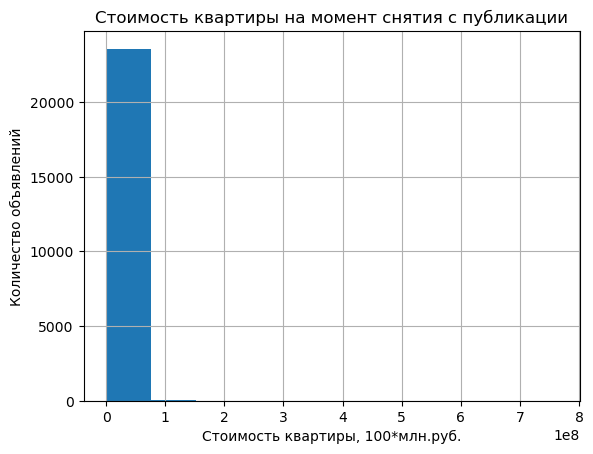

In [116]:
data['last_price'].hist()
plt.xlabel('Стоимость квартиры, 100*млн.руб.')
plt.ylabel('Количество объявлений')
plt.title('Стоимость квартиры на момент снятия с публикации')
plt.show()

Столбец 'last_price' содержит данные о стоимости квартир от 12190 до 763000000 руб. Гистограмма показывает, что абсолютное больше квартир имеет стоимость до 100 млн. руб. Одновременно из таблицы видим, что квартира стоимостью ниже 400 тыс. руб. только одна, показатель ее сильно выбивается. Для более корректного анализа исключим из таблицы выбивающиеся значения - до 400 тыс. руб. и выше 100 млн. руб.

In [117]:
data = data[(data['last_price'] >= 400000) & (data['last_price'] <= 100000000)]

In [118]:
data = data.reset_index(drop=True)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23612 entries, 0 to 23611
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23612 non-null  int64  
 1   last_price            23612 non-null  int32  
 2   total_area            23612 non-null  float64
 3   first_day_exposition  23612 non-null  object 
 4   rooms                 23612 non-null  int64  
 5   ceiling_height        23612 non-null  float64
 6   floors_total          23612 non-null  int32  
 7   living_area           23612 non-null  int32  
 8   floor                 23612 non-null  int64  
 9   is_apartment          23612 non-null  bool   
 10  studio                23612 non-null  bool   
 11  open_plan             23612 non-null  bool   
 12  kitchen_area          23612 non-null  int32  
 13  balcony               23612 non-null  int32  
 14  locality_name         23612 non-null  object 
 15  airports_nearest   

##### Изучаем столбец "сколько дней было размещено объявление (от публикации до снятия)" ('days_exposition').

In [120]:
data['days_exposition'].unique()

array([  nan,   81.,  558., ..., 1360., 1007.,  971.])

In [121]:
data['days_exposition'].value_counts()

45.0      878
60.0      538
7.0       234
30.0      208
90.0      203
         ... 
793.0       1
1434.0      1
1231.0      1
739.0       1
971.0       1
Name: days_exposition, Length: 1140, dtype: int64

В этом столбце аномалий не обнаружено. Переводим данные столбца в тип int.

In [122]:
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23612 entries, 0 to 23611
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23612 non-null  int64  
 1   last_price            23612 non-null  int32  
 2   total_area            23612 non-null  float64
 3   first_day_exposition  23612 non-null  object 
 4   rooms                 23612 non-null  int64  
 5   ceiling_height        23612 non-null  float64
 6   floors_total          23612 non-null  int32  
 7   living_area           23612 non-null  int32  
 8   floor                 23612 non-null  int64  
 9   is_apartment          23612 non-null  bool   
 10  studio                23612 non-null  bool   
 11  open_plan             23612 non-null  bool   
 12  kitchen_area          23612 non-null  int32  
 13  balcony               23612 non-null  int32  
 14  locality_name         23612 non-null  object 
 15  airports_nearest   

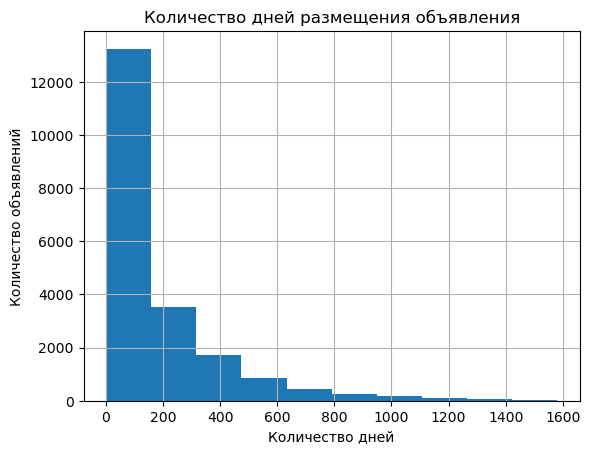

In [124]:
data['days_exposition'].hist()
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений')
plt.title('Количество дней размещения объявления')
plt.show()

##### Изучаем столбец "число фотографий квартиры в объявлении" ('total_images').

In [125]:
data['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37], dtype=int64)

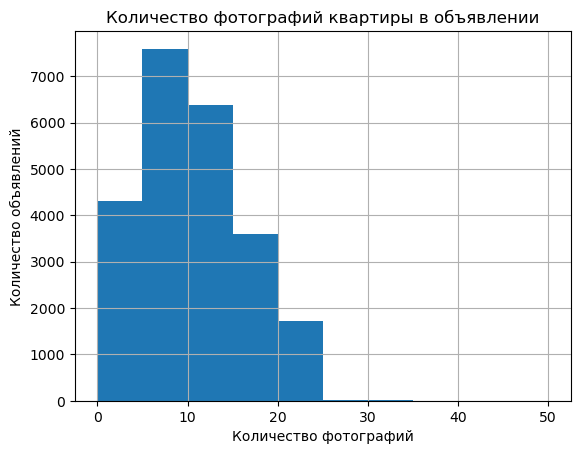

In [126]:
data['total_images'].hist()
plt.xlabel('Количество фотографий')
plt.ylabel('Количество объявлений')
plt.title('Количество фотографий квартиры в объявлении')
plt.show()

В столбце "число фотографий квартиры в объявлении" ('total_images') аномалий не обнаружено.

##### Изучаем столбец "общая площадь квартиры в квадратных метрах (м²)" ('total_area').

In [127]:
data['total_area'].unique()

array([108.  ,  40.4 ,  56.  , ...,  66.86, 133.81,  76.75])

In [128]:
data['total_area'].value_counts()

45.00     419
42.00     383
31.00     346
60.00     346
44.00     343
         ... 
130.21      1
58.71       1
60.75       1
63.19       1
76.75       1
Name: total_area, Length: 2159, dtype: int64

In [129]:
data['total_area'].sort_values(ascending=False)

5339     590.0
4221     517.0
7990     507.0
12366    495.0
9793     494.1
         ...  
19493     13.2
19481     13.0
17901     13.0
19742     13.0
19838     12.0
Name: total_area, Length: 23612, dtype: float64

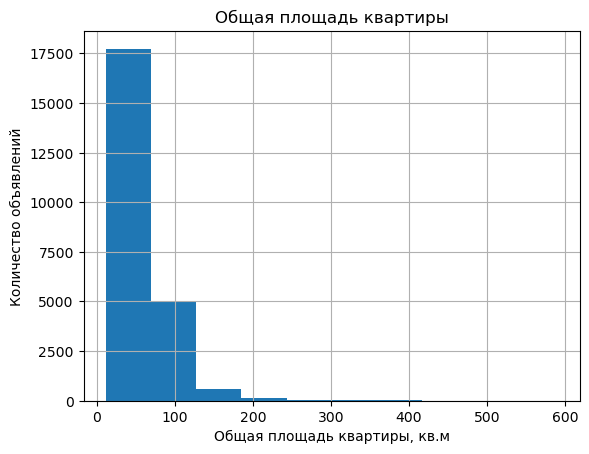

In [130]:
data['total_area'].hist()
plt.xlabel('Общая площадь квартиры, кв.м')
plt.ylabel('Количество объявлений')
plt.title('Общая площадь квартиры')
plt.show()

Из таблицы и гистограммы видно, что доля квартир площадью более 250 м2 совсем незначительная, но может быть важная для анализа.

##### Изучаем столбец "дата публикации" ('first_day_exposition').

In [131]:
data['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

In [132]:
data['first_day_exposition'].value_counts()

2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2015-07-25T00:00:00      1
2015-03-05T00:00:00      1
2015-09-05T00:00:00      1
2016-12-10T00:00:00      1
2015-07-19T00:00:00      1
Name: first_day_exposition, Length: 1490, dtype: int64

In [133]:
data['first_day_exposition'].sort_values(ascending=False)

17493    2019-05-03T00:00:00
14378    2019-05-03T00:00:00
8142     2019-05-03T00:00:00
3241     2019-05-03T00:00:00
10883    2019-05-03T00:00:00
                ...         
15379    2014-11-27T00:00:00
15807    2014-11-27T00:00:00
10098    2014-11-27T00:00:00
617      2014-11-27T00:00:00
21789    2014-11-27T00:00:00
Name: first_day_exposition, Length: 23612, dtype: object

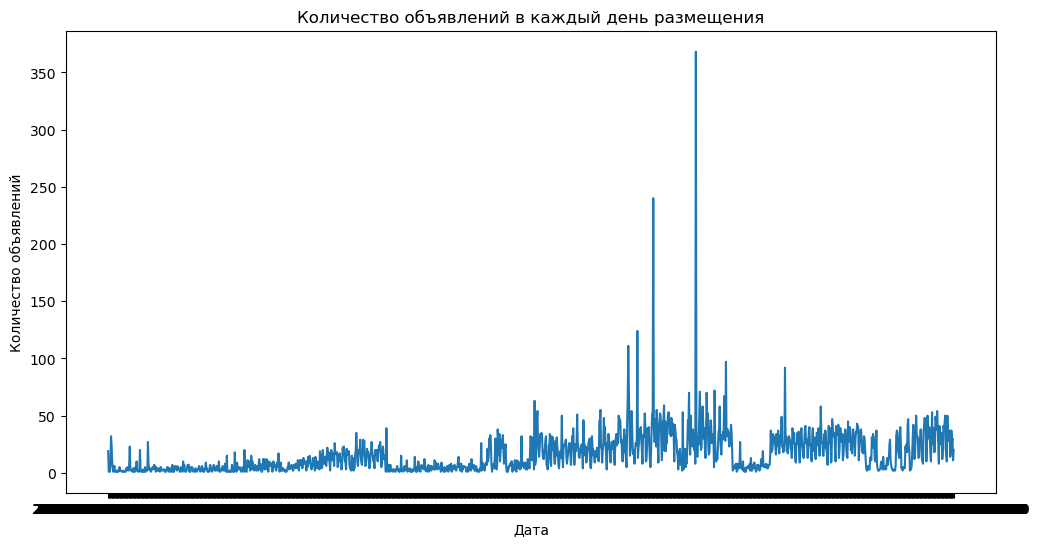

In [134]:
daily_counts = data['first_day_exposition'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_counts.index, y=daily_counts.values)
plt.xlabel('Дата')
plt.ylabel('Количество объявлений')
plt.title('Количество объявлений в каждый день размещения')
plt.show()

Даты корректные, аномалий не видно.

##### Изучаем столбец "число комнат" ('rooms').

In [135]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16],
      dtype=int64)

In [136]:
data['rooms'].value_counts()

1     8036
2     7922
3     5793
4     1166
5      316
0      197
6      100
7       54
8       10
9        8
10       3
11       2
14       2
15       1
19       1
16       1
Name: rooms, dtype: int64

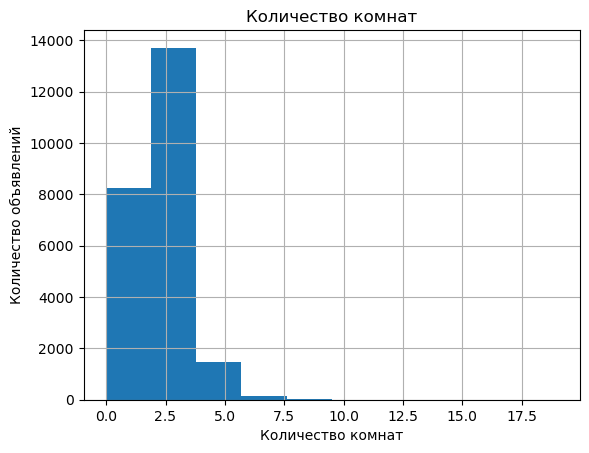

In [137]:
data['rooms'].hist()
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.title('Количество комнат')
plt.show()

Квартиры больше семи комнат редки, но выбивающихся значений нет.

##### Исследуем столбец "этаж" ('floor').

In [138]:
data['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31],
      dtype=int64)

In [139]:
data['floor'].value_counts()

2     3350
3     3059
1     2911
4     2794
5     2610
6     1301
7     1208
8     1081
9     1049
10     686
12     525
11     523
13     379
15     343
14     335
16     315
17     227
18     178
19     147
21     123
22     112
20     110
23      99
24      63
25      44
26      24
27      10
28       1
30       1
29       1
32       1
33       1
31       1
Name: floor, dtype: int64

In [140]:
data['floor'].sort_values(ascending=False)

18158    33
11540    32
18568    31
1911     30
11045    29
         ..
6016      1
6013      1
18428     1
6005      1
23611     1
Name: floor, Length: 23612, dtype: int64

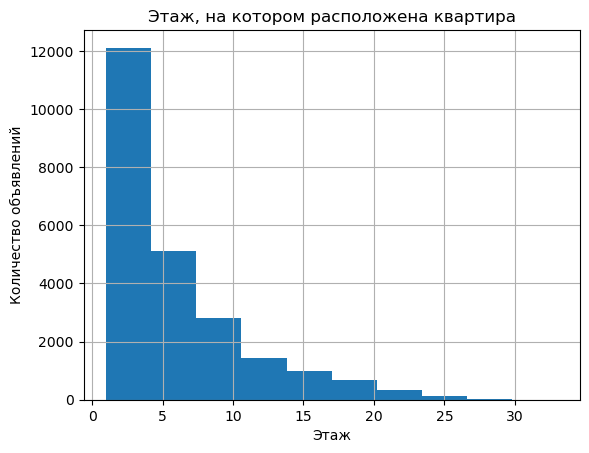

In [141]:
data['floor'].hist()
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')
plt.title('Этаж, на котором расположена квартира')
plt.show()

Абсолютное большинство квартир расположены с 1-го по 5-й этаж. Есть квартира и на 33-м этаже. Аномалий не найдено.

##### Исследуем столбец "квартира-студия (булев тип)" ('studio').

In [142]:
data['studio'].unique()

array([False,  True])

In [143]:
data['studio'].value_counts()

False    23463
True       149
Name: studio, dtype: int64

In [144]:
149 / 23612 * 100

0.6310350669151279

Квартир-студий всего 0,63% от общего числа продающихся квартир.

##### Исследуем столбец "свободная планировка (булев тип)" ('open_plan').

In [145]:
data['open_plan'].unique()

array([False,  True])

In [146]:
data['open_plan'].value_counts()

False    23545
True        67
Name: open_plan, dtype: int64

In [147]:
67 / 23612 * 100

0.2837540233779434

Квартир со свободной планировкой всего 0,28% от всех продающихся квартир.

#### Вывод

Так как общий датафрейм получен на основе двух типов данных - заполненных пользователем и картографических, то сразу видно, что картографические данные неполные, у объектов из многих населенных пунктов их просто нет. Об этом говорит процент пропусков - от 23 до 66. Так как мы не можем точно заполнить эти пропуски - мы оставляем их. Для некоторых исследований эти данные не нужны, а в некоторых будет достаточно и этих. <br />
В данных, заполненных пользователями, не обнаружено существенных проблем для дальнейшего исследования, а остальные пропуски и ошибки мы исправили.

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавляем в таблицу столбец "цена одного квадратного метра" ('metr_price') и считаем значения на все объекты. Одновременно переводим в тип int.

In [148]:
data['metr_price'] = (data['last_price'] / data['total_area']).astype('int')

#### Добавляем в таблицу столбец "день публикации объявления" ('day_week') и считаем значения на все объекты.

In [149]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')

In [150]:
data['day_week'] = data['first_day_exposition'].dt.dayofweek

#### Добавляем в таблицу столбцы "месяц" ('month') и "год" ('year').

In [151]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [152]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

#### Добавляем в таблицу столбец "тип этажа квартиры" ('floor_type') и считаем значения на все объекты.

In [153]:
def f(row):
    if row['floor'] == 1:
        val = 'первый'
    elif row['floor'] == row['floors_total']:
        val = 'последний'
    else:
        val = 'другой'
    return val
        
data['floor_type'] = data.apply(f, axis=1)

#### Добавляем в таблицу столбец "расстояние в км до центра города" ('city_centers_km') и считаем значения.

In [154]:
data['city_centers_km'] = (data['city_centers_nearest'] / 1000).astype('Int64')

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23612 entries, 0 to 23611
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23612 non-null  int64         
 1   last_price            23612 non-null  int32         
 2   total_area            23612 non-null  float64       
 3   first_day_exposition  23612 non-null  datetime64[ns]
 4   rooms                 23612 non-null  int64         
 5   ceiling_height        23612 non-null  float64       
 6   floors_total          23612 non-null  int32         
 7   living_area           23612 non-null  int32         
 8   floor                 23612 non-null  int64         
 9   is_apartment          23612 non-null  bool          
 10  studio                23612 non-null  bool          
 11  open_plan             23612 non-null  bool          
 12  kitchen_area          23612 non-null  int32         
 13  balcony         

Необходимые колонки добавлены, тип данных изменен на цельночисловой для удобства дальнейшей работы с этими данными.

### Проведите исследовательский анализ данных

#### Изучаем параметр "общая площадь".

In [156]:
pd.set_option('display.max_columns', None)
data.sort_values(by=['total_area'], ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,day_week,month,year,floor_type,city_centers_km
5339,20,65000000,590.0,2019-02-14,15,3.50,6,409,3,False,False,False,409,0,Санкт-Петербург,24447,4666,1,767,0,<NA>,14,110169,3,2,2019,другой,4
4221,1,50000000,517.0,2017-10-14,7,2.65,4,332,3,False,False,False,332,0,Санкт-Петербург,22835,1847,2,477,2,540,<NA>,96711,5,10,2017,другой,1
7990,20,84000000,507.0,2015-12-17,5,4.45,7,301,7,True,False,False,301,1,Санкт-Петербург,<NA>,5735,2,110,0,<NA>,1078,165680,3,12,2015,последний,5
12366,20,91500000,495.0,2017-06-19,7,4.65,7,347,7,False,False,False,347,0,Санкт-Петербург,<NA>,5735,2,110,0,<NA>,14,184848,0,6,2017,последний,5
9793,1,43185328,494.1,2017-05-12,1,2.85,12,282,3,False,False,False,282,0,Санкт-Петербург,28529,6832,1,592,0,<NA>,5,87401,4,5,2017,другой,6
22411,7,91075000,491.0,2017-05-27,5,4.20,9,274,9,False,False,False,274,0,Санкт-Петербург,25525,5845,2,116,0,<NA>,115,185488,5,5,2017,последний,5
6600,20,99000000,488.0,2017-04-09,5,2.95,20,216,17,False,False,False,216,0,Санкт-Петербург,27641,4598,1,646,1,368,351,202868,6,4,2017,другой,4
660,3,49950000,483.9,2017-10-04,7,3.20,6,312,4,False,False,False,312,0,Санкт-Петербург,23079,945,3,461,3,22,391,103223,2,10,2017,другой,0
6200,8,34000000,470.3,2018-01-14,4,2.65,3,248,3,False,False,False,248,0,Санкт-Петербург,43756,15459,1,852,3,122,179,72294,6,1,2018,последний,15
20204,12,20000000,460.8,2019-03-20,6,3.10,3,279,1,False,False,False,279,0,Санкт-Петербург,43756,15459,1,852,3,122,21,43402,2,3,2019,первый,15


In [157]:
slice_total_area = data.query('locality_name == "Санкт-Петербург"')
len(slice_total_area)

15683

In [158]:
15683 / 23612 * 100

66.41961714382518

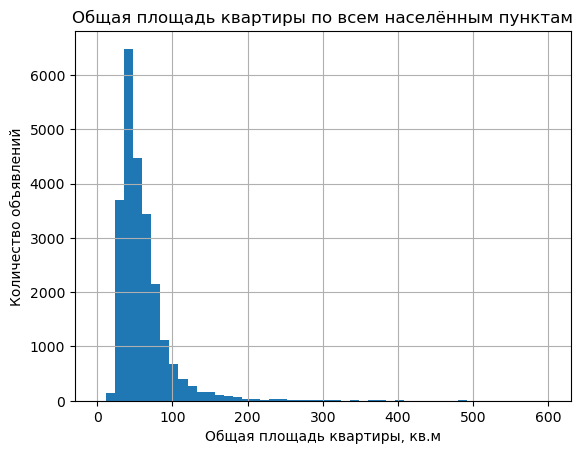

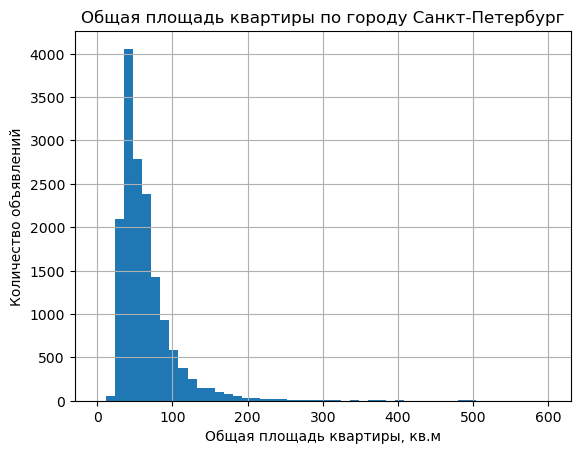

In [159]:
import matplotlib.pyplot as plt
data.hist('total_area', bins=50, range=(0, 600))
plt.xlabel('Общая площадь квартиры, кв.м')
plt.ylabel('Количество объявлений')
plt.title('Общая площадь квартиры по всем населённым пунктам')
plt.show()
slice_total_area.hist('total_area', bins=50, range=(0, 600))
plt.xlabel('Общая площадь квартиры, кв.м')
plt.ylabel('Количество объявлений')
plt.title('Общая площадь квартиры по городу Санкт-Петербург')
plt.show()

Самые большие по общей площади квартиры находятся в Санк-Петербурге. На долю Санкт-Петербурга приходится 15683 объявлений о продаже - 66%. Гистограммы среза по Санкт-Петербургу и всему датафрейму очень похожи, имеют одтн всплеск около 40 м2.

#### Изучаем параметр "жилая площадь".

In [160]:
data.sort_values(by=['living_area'], ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,day_week,month,year,floor_type,city_centers_km
5339,20,65000000,590.0,2019-02-14,15,3.50,6,409,3,False,False,False,409,0,Санкт-Петербург,24447,4666,1,767,0,<NA>,14,110169,3,2,2019,другой,4
12366,20,91500000,495.0,2017-06-19,7,4.65,7,347,7,False,False,False,347,0,Санкт-Петербург,<NA>,5735,2,110,0,<NA>,14,184848,0,6,2017,последний,5
4221,1,50000000,517.0,2017-10-14,7,2.65,4,332,3,False,False,False,332,0,Санкт-Петербург,22835,1847,2,477,2,540,<NA>,96711,5,10,2017,другой,1
660,3,49950000,483.9,2017-10-04,7,3.20,6,312,4,False,False,False,312,0,Санкт-Петербург,23079,945,3,461,3,22,391,103223,2,10,2017,другой,0
7990,20,84000000,507.0,2015-12-17,5,4.45,7,301,7,True,False,False,301,1,Санкт-Петербург,<NA>,5735,2,110,0,<NA>,1078,165680,3,12,2015,последний,5
14044,8,51000000,402.0,2017-02-07,6,3.15,8,300,6,False,False,False,300,2,Санкт-Петербург,24484,5052,1,253,0,<NA>,32,126865,1,2,2017,другой,5
9793,1,43185328,494.1,2017-05-12,1,2.85,12,282,3,False,False,False,282,0,Санкт-Петербург,28529,6832,1,592,0,<NA>,5,87401,4,5,2017,другой,6
20204,12,20000000,460.8,2019-03-20,6,3.10,3,279,1,False,False,False,279,0,Санкт-Петербург,43756,15459,1,852,3,122,21,43402,2,3,2019,первый,15
22411,7,91075000,491.0,2017-05-27,5,4.20,9,274,9,False,False,False,274,0,Санкт-Петербург,25525,5845,2,116,0,<NA>,115,185488,5,5,2017,последний,5
14452,6,32250000,374.6,2018-06-09,19,2.65,5,264,2,False,False,False,264,0,Санкт-Петербург,19497,3574,0,<NA>,2,548,114,86091,5,6,2018,другой,3


In [161]:
slice_living_area = data.query('locality_name == "Санкт-Петербург"')
len(slice_living_area)

15683

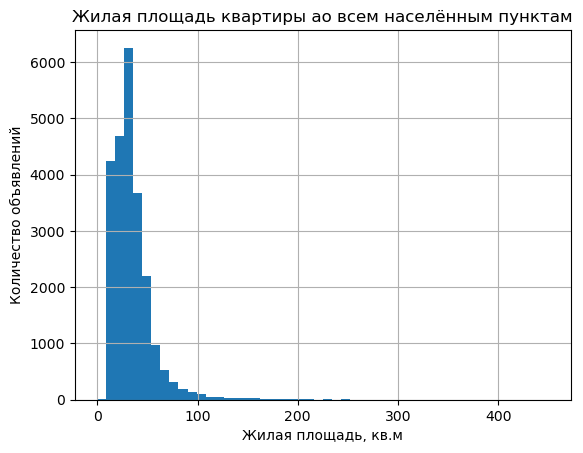

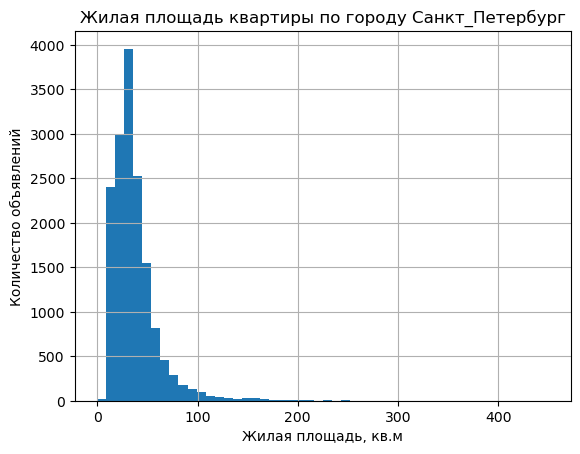

In [162]:
data.hist('living_area', bins=50, range=(0, 450))
plt.xlabel('Жилая площадь, кв.м')
plt.ylabel('Количество объявлений')
plt.title('Жилая площадь квартиры ао всем населённым пунктам')
plt.show()
slice_living_area.hist('living_area', bins=50, range=(0, 450))
plt.xlabel('Жилая площадь, кв.м')
plt.ylabel('Количество объявлений')
plt.title('Жилая площадь квартиры по городу Санкт_Петербург')
plt.show()

По размеру жилой площади так же лидирует Санкт-Петербург, его гистограмма и общая гистограмма очень похожи. Видно один всплеск на 30 м2.

#### Изучаем параметр "площадь кухни".

In [163]:
data.sort_values(by=['kitchen_area'], ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,day_week,month,year,floor_type,city_centers_km
5339,20,65000000,590.0,2019-02-14,15,3.50,6,409,3,False,False,False,409,0,Санкт-Петербург,24447,4666,1,767,0,<NA>,14,110169,3,2,2019,другой,4
12366,20,91500000,495.0,2017-06-19,7,4.65,7,347,7,False,False,False,347,0,Санкт-Петербург,<NA>,5735,2,110,0,<NA>,14,184848,0,6,2017,последний,5
4221,1,50000000,517.0,2017-10-14,7,2.65,4,332,3,False,False,False,332,0,Санкт-Петербург,22835,1847,2,477,2,540,<NA>,96711,5,10,2017,другой,1
660,3,49950000,483.9,2017-10-04,7,3.20,6,312,4,False,False,False,312,0,Санкт-Петербург,23079,945,3,461,3,22,391,103223,2,10,2017,другой,0
7990,20,84000000,507.0,2015-12-17,5,4.45,7,301,7,True,False,False,301,1,Санкт-Петербург,<NA>,5735,2,110,0,<NA>,1078,165680,3,12,2015,последний,5
14044,8,51000000,402.0,2017-02-07,6,3.15,8,300,6,False,False,False,300,2,Санкт-Петербург,24484,5052,1,253,0,<NA>,32,126865,1,2,2017,другой,5
9793,1,43185328,494.1,2017-05-12,1,2.85,12,282,3,False,False,False,282,0,Санкт-Петербург,28529,6832,1,592,0,<NA>,5,87401,4,5,2017,другой,6
20204,12,20000000,460.8,2019-03-20,6,3.10,3,279,1,False,False,False,279,0,Санкт-Петербург,43756,15459,1,852,3,122,21,43402,2,3,2019,первый,15
22411,7,91075000,491.0,2017-05-27,5,4.20,9,274,9,False,False,False,274,0,Санкт-Петербург,25525,5845,2,116,0,<NA>,115,185488,5,5,2017,последний,5
14452,6,32250000,374.6,2018-06-09,19,2.65,5,264,2,False,False,False,264,0,Санкт-Петербург,19497,3574,0,<NA>,2,548,114,86091,5,6,2018,другой,3


In [164]:
slice_kitchen_area = data.query('locality_name == "Санкт-Петербург"')
len(slice_kitchen_area)

15683

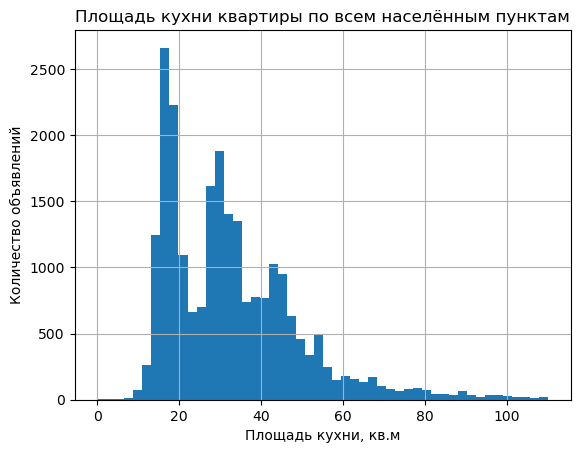

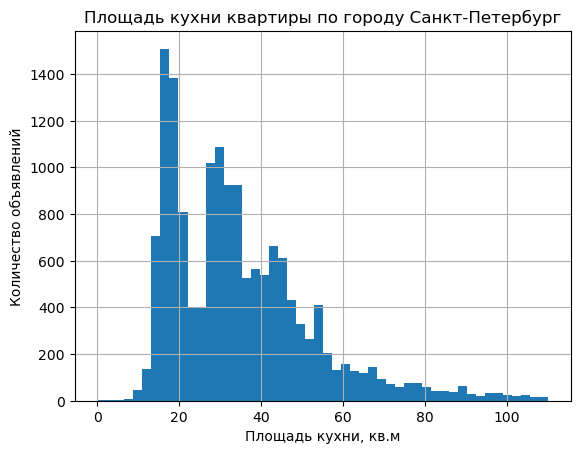

In [165]:
data.hist('kitchen_area', bins=50, range=(0, 110))
plt.xlabel('Площадь кухни, кв.м')
plt.ylabel('Количество объявлений')
plt.title('Площадь кухни квартиры по всем населённым пунктам')
plt.show()
slice_kitchen_area.hist('kitchen_area', bins=50, range=(0, 110))
plt.xlabel('Площадь кухни, кв.м')
plt.ylabel('Количество объявлений')
plt.title('Площадь кухни квартиры по городу Санкт-Петербург')
plt.show()

В Санкт-Петербурге самы большие по площади кухни. Гистограммы Санкт-Петербурга и общая очень похожи, один пик на 10 м2.

#### Исследуем параметр "цена на момент снятия с публикации".

In [166]:
data.sort_values(by=['last_price'], ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,day_week,month,year,floor_type,city_centers_km
5612,14,99000000,280.0,2018-01-19,3,2.65,4,160,4,False,False,False,160,0,Санкт-Петербург,21178,1281,2,283,3,22,<NA>,353571,4,1,2018,последний,1
6600,20,99000000,488.0,2017-04-09,5,2.95,20,216,17,False,False,False,216,0,Санкт-Петербург,27641,4598,1,646,1,368,351,202868,6,4,2017,другой,4
16535,10,98000000,155.0,2017-12-16,3,2.65,8,88,6,False,False,False,88,0,Санкт-Петербург,32440,5297,0,<NA>,2,198,90,632258,5,12,2017,другой,5
155,8,96000000,317.0,2017-07-07,4,3.50,3,183,3,False,False,False,183,1,Санкт-Петербург,22673,1771,2,508,3,366,62,302839,4,7,2017,последний,1
11294,17,95000000,190.0,2019-02-10,5,3.00,7,130,6,False,False,False,130,0,Санкт-Петербург,21179,1032,3,238,3,31,18,500000,6,2,2019,другой,1
492,18,95000000,216.0,2017-12-05,4,3.00,5,86,4,False,False,False,86,0,Санкт-Петербург,21740,436,2,138,3,620,14,439814,1,12,2017,другой,0
12366,20,91500000,495.0,2017-06-19,7,4.65,7,347,7,False,False,False,347,0,Санкт-Петербург,<NA>,5735,2,110,0,<NA>,14,184848,0,6,2017,последний,5
22411,7,91075000,491.0,2017-05-27,5,4.20,9,274,9,False,False,False,274,0,Санкт-Петербург,25525,5845,2,116,0,<NA>,115,185488,5,5,2017,последний,5
509,5,90000000,225.0,2016-06-26,6,2.65,4,134,2,False,False,False,134,2,Санкт-Петербург,32864,5720,0,<NA>,2,519,416,400000,6,6,2016,другой,5
15103,15,88000000,400.0,2019-03-27,9,2.50,2,250,1,False,False,False,250,0,Санкт-Петербург,24395,2725,2,315,1,578,<NA>,220000,2,3,2019,первый,2


In [167]:
slice_last_price = data.query('locality_name == "Санкт-Петербург"')
len(slice_last_price)

15683

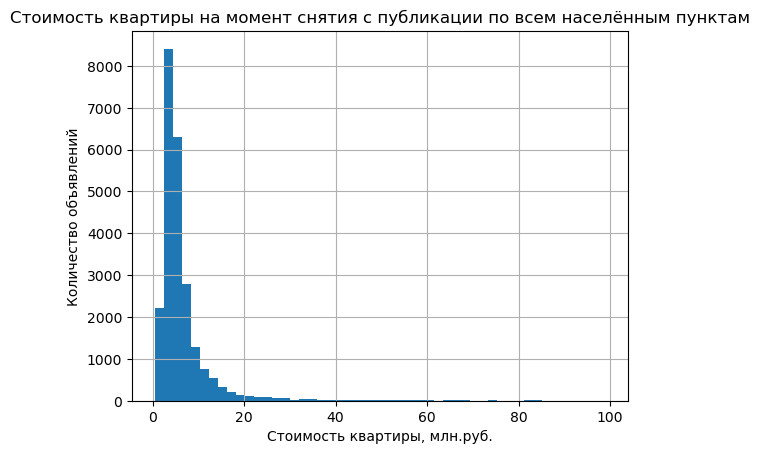

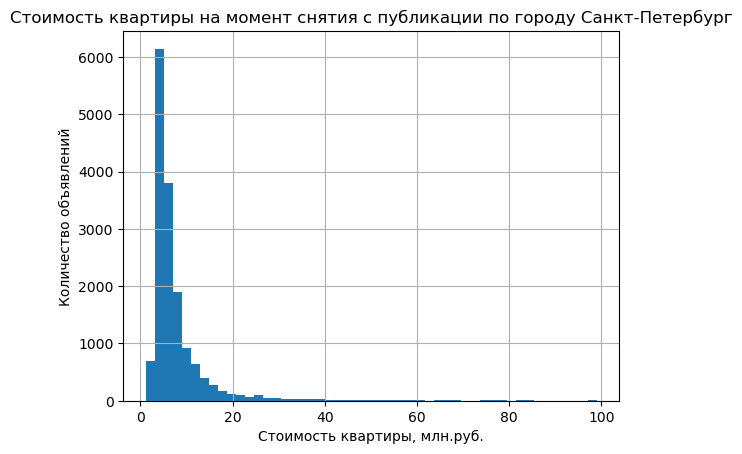

In [168]:
(data['last_price']/1000000).hist(bins=50)
plt.xlabel('Стоимость квартиры, млн.руб.')
plt.ylabel('Количество объявлений')
plt.title('Стоимость квартиры на момент снятия с публикации по всем населённым пунктам')
plt.show()
(slice_last_price['last_price']/1000000).hist(bins=50)
plt.xlabel('Стоимость квартиры, млн.руб.')
plt.ylabel('Количество объявлений')
plt.title('Стоимость квартиры на момент снятия с публикации по городу Санкт-Петербург')
plt.show()

В Санкт-Петербурге самые дорогие квартиры. Гистограммы Санкт-Петербурга и общая очень похожи, один пик на 550 тыс. руб. 

#### Исследуем параметр "количество комнат".

In [169]:
data.sort_values(by=['rooms'], ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,day_week,month,year,floor_type,city_centers_km
14452,6,32250000,374.6,2018-06-09,19,2.65,5,264,2,False,False,False,264,0,Санкт-Петербург,19497,3574,0,<NA>,2,548,114,86091,5,6,2018,другой,3
18787,6,28500000,270.0,2015-03-02,16,3.00,4,180,4,False,False,False,180,1,Санкт-Петербург,23575,4142,1,516,0,<NA>,1365,105555,0,3,2015,последний,4
5339,20,65000000,590.0,2019-02-14,15,3.50,6,409,3,False,False,False,409,0,Санкт-Петербург,24447,4666,1,767,0,<NA>,14,110169,3,2,2019,другой,4
20756,6,28659000,245.4,2016-03-31,14,2.65,4,168,2,False,False,False,168,0,Санкт-Петербург,21104,2054,3,541,2,118,95,116784,3,3,2016,другой,2
865,5,25000000,363.0,2017-12-23,14,3.16,5,222,4,False,False,False,222,0,Санкт-Петербург,38076,7950,0,<NA>,2,435,418,68870,5,12,2017,другой,7
9656,8,33000000,194.1,2017-02-07,11,3.43,5,129,2,False,False,False,129,0,Санкт-Петербург,21469,1015,1,686,2,66,813,170015,1,2,2017,другой,1
648,3,17500000,183.7,2018-07-01,11,3.40,7,138,7,False,False,False,138,0,Санкт-Петербург,23606,3148,0,<NA>,0,<NA>,<NA>,95264,6,7,2018,последний,3
18830,11,40000000,290.0,2016-06-21,10,3.50,6,189,6,False,False,False,189,1,Санкт-Петербург,26229,4932,3,316,1,227,77,137931,1,6,2016,последний,4
4135,6,23000000,272.6,2018-01-11,10,3.14,7,145,7,False,False,False,145,1,Санкт-Петербург,10726,12169,1,191,1,531,<NA>,84372,3,1,2018,последний,12
18059,4,15500000,216.1,2016-07-04,10,3.15,5,161,2,False,False,False,161,0,Санкт-Петербург,24353,4921,1,368,0,<NA>,11,71726,0,7,2016,другой,4


In [170]:
slice_rooms = data.query('locality_name == "Санкт-Петербург"')
len(slice_rooms)

15683

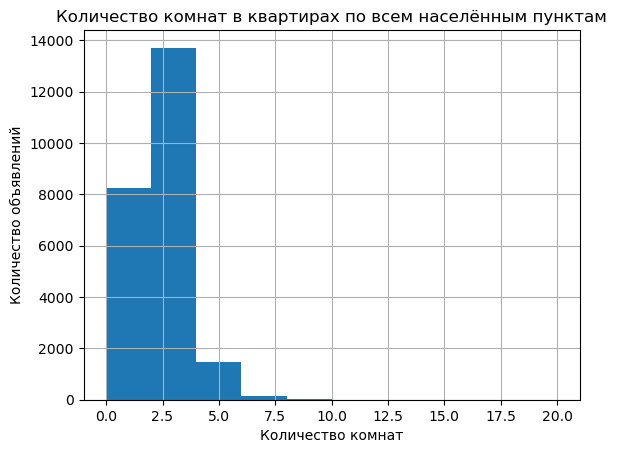

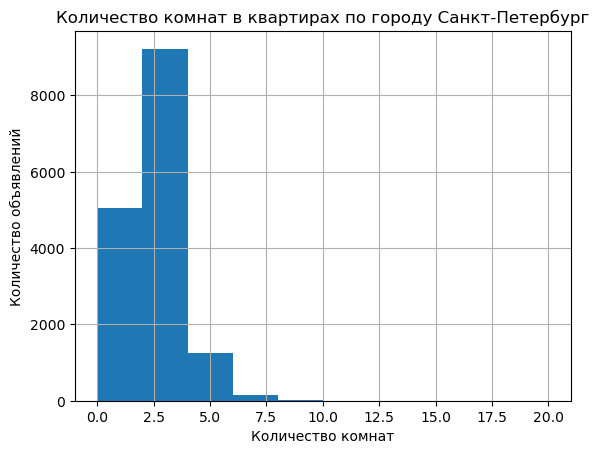

In [171]:
data.hist('rooms', bins=10, range=(0, 20))
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.title('Количество комнат в квартирах по всем населённым пунктам')
plt.show()
slice_rooms.hist('rooms', bins=10, range=(0, 20))
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.title('Количество комнат в квартирах по городу Санкт-Петербург')
plt.show()

Квартиры с наибольшим количеством комнат находятся в Санкт_Петербурге. Гистограммы Санкт_Петербурга и всего датафрейма очень похожи, всплеск приходится на 2-х и 3-хкомнатные квартиры.

#### Исследуем параметр "высота потолков".

In [172]:
data.sort_values(by=['ceiling_height'], ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,day_week,month,year,floor_type,city_centers_km
1051,13,550000,29.0,2018-02-01,1,5.00,3,16,1,False,False,False,16,0,Бокситогорск,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,6,18965,3,2,2018,первый,<NA>
2790,7,14950000,50.0,2016-03-06,2,4.80,3,30,2,False,False,False,30,0,Санкт-Петербург,24433,1725,1,589,3,161,160,299000,6,3,2016,другой,1
19079,10,8650000,87.7,2017-07-18,2,4.70,26,57,26,False,False,False,57,2,Санкт-Петербург,40648,9888,1,1248,0,<NA>,15,98631,1,7,2017,последний,9
12366,20,91500000,495.0,2017-06-19,7,4.65,7,347,7,False,False,False,347,0,Санкт-Петербург,<NA>,5735,2,110,0,<NA>,14,184848,0,6,2017,последний,5
9751,13,37900000,220.0,2017-10-23,6,4.50,5,148,5,False,False,False,148,1,Санкт-Петербург,32534,4725,0,<NA>,2,594,364,172272,0,10,2017,последний,4
2811,8,2700000,39.0,2018-02-01,1,4.50,6,18,6,False,False,False,18,0,поселок городского типа Токсово,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,69230,3,2,2018,последний,<NA>
3055,13,6600000,95.0,2018-09-08,2,4.50,7,45,7,True,False,False,45,2,Выборг,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,96,69473,5,9,2018,последний,<NA>
6780,15,7500000,69.0,2017-02-15,2,4.50,3,64,3,False,False,False,64,0,Санкт-Петербург,40326,15610,0,<NA>,2,852,427,108695,2,2,2017,последний,15
13183,8,16900000,170.0,2019-03-27,6,4.50,4,115,4,False,False,False,115,0,Санкт-Петербург,26619,5579,0,<NA>,1,281,<NA>,99411,2,3,2019,последний,5
10125,14,11500000,85.6,2018-12-18,3,4.50,3,63,3,False,False,False,63,0,Санкт-Петербург,51944,16170,0,<NA>,2,389,34,134345,1,12,2018,последний,16


In [173]:
slice_ceiling_height = data.query('locality_name == "Санкт-Петербург"')
len(slice_ceiling_height)

15683

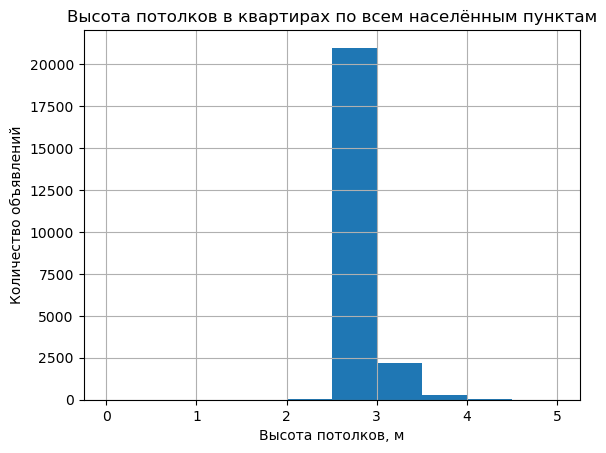

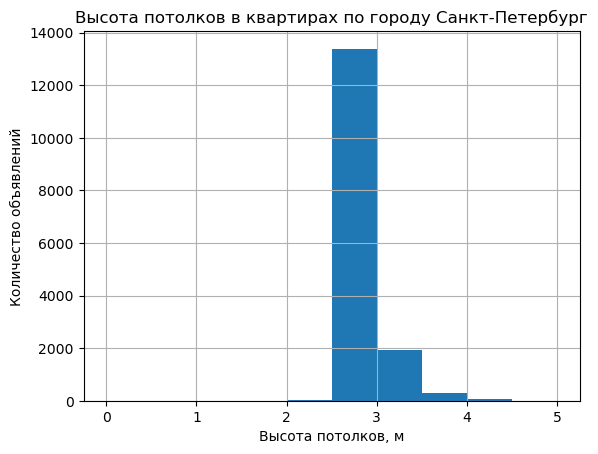

In [174]:
data.hist('ceiling_height', bins=10, range=(0, 5))
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество объявлений')
plt.title('Высота потолков в квартирах по всем населённым пунктам')
plt.show()
slice_ceiling_height.hist('ceiling_height', bins=10, range=(0, 5))
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество объявлений')
plt.title('Высота потолков в квартирах по городу Санкт-Петербург')
plt.show()

По этому параметру Санкт_Петербург является лидером, больщинство квартир с самыми высокими потолками приходятся на него. Гистограммы Санкт_Петербурга и всего датафрейма очень похожи, всплеск приходится на высоту потолков 2,5 м.

#### Исследуем параметр "этаж квартиры".

In [175]:
data.sort_values(by=['floor'], ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,day_week,month,year,floor_type,city_centers_km
18158,4,9900000,101.00,2018-09-27,3,2.65,35,53,33,False,False,False,53,2,Санкт-Петербург,18737,20450,0,<NA>,3,72,7,98019,3,9,2018,другой,20
11540,9,9900000,101.00,2016-04-28,3,2.65,33,53,32,False,False,False,53,0,Санкт-Петербург,18732,20444,0,<NA>,3,80,53,98019,3,4,2016,другой,20
18568,20,5700000,54.00,2017-12-08,1,2.65,35,21,31,False,False,False,21,0,Санкт-Петербург,18732,20444,0,<NA>,3,80,128,105555,4,12,2017,другой,20
1911,13,10150000,74.00,2017-11-17,2,2.80,35,34,30,False,False,False,34,0,Санкт-Петербург,18732,20444,0,<NA>,3,80,<NA>,137162,4,11,2017,другой,20
11045,16,9200000,75.00,2019-02-22,2,2.70,36,40,29,False,False,False,40,2,Санкт-Петербург,18732,20444,0,<NA>,3,80,<NA>,122666,4,2,2019,другой,20
397,15,5990000,54.00,2018-03-22,2,2.65,36,21,28,False,False,False,21,1,Санкт-Петербург,18732,20444,0,<NA>,3,80,11,110925,3,3,2018,другой,20
113,8,5750000,78.00,2016-05-19,3,2.65,27,45,27,False,False,False,45,2,посёлок Парголово,53134,19311,0,<NA>,0,<NA>,426,73717,3,5,2016,последний,19
8468,20,7500000,73.30,2017-05-18,3,2.65,35,28,27,False,False,False,28,0,Санкт-Петербург,18732,20444,0,<NA>,3,80,250,102319,3,5,2017,другой,20
12850,7,7600000,70.00,2016-11-18,3,2.70,35,36,27,False,False,False,36,2,Санкт-Петербург,18732,20444,0,<NA>,3,80,413,108571,4,11,2016,другой,20
23205,6,2980000,36.02,2018-07-26,1,2.65,27,20,27,False,False,False,20,1,Мурино,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,72,82731,3,7,2018,последний,<NA>


In [176]:
slice_floor = data.query('locality_name == "Санкт-Петербург"')
len(slice_floor)

15683

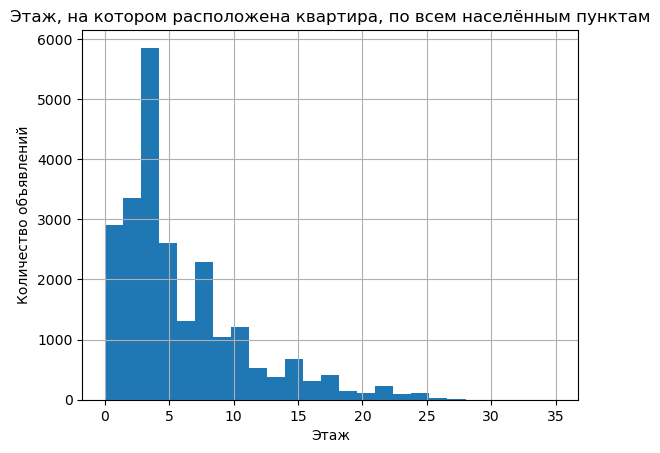

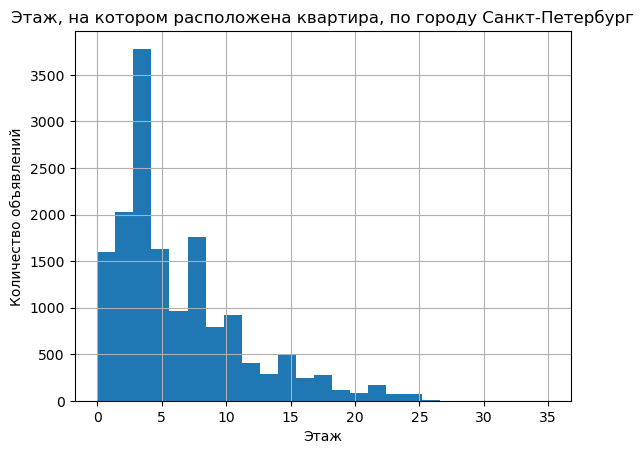

In [177]:
data.hist('floor', bins=25, range=(0, 35))
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')
plt.title('Этаж, на котором расположена квартира, по всем населённым пунктам')
plt.show()
slice_floor.hist('floor', bins=25, range=(0, 35))
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')
plt.title('Этаж, на котором расположена квартира, по городу Санкт-Петербург')
plt.show()

Дома с квартирами на самых высоких этажах расположены в Санкт-Петербурге. Гистограммы среза для Санкт-Петербурга и общего датафрейма похожи, на них заметно несколько всплесков, самый значительный на 4-м этаже.

#### Исследуем параметр "тип этажа квартиры («первый», «последний», «другой»)".

In [178]:
data['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [179]:
data['floor_type'].value_counts()

другой       17304
последний     3397
первый        2911
Name: floor_type, dtype: int64

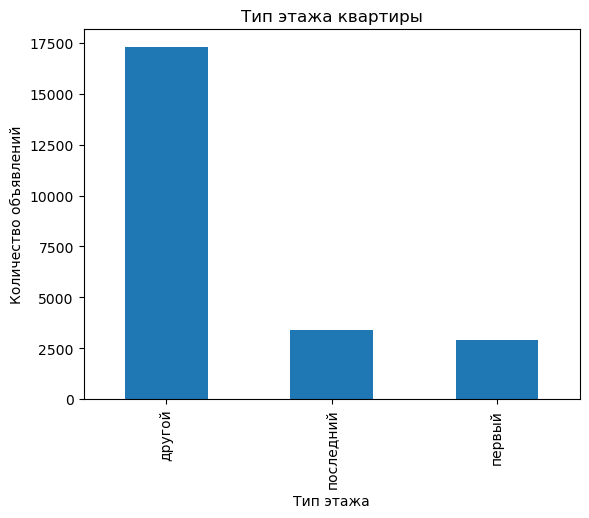

In [180]:
data['floor_type'].value_counts(dropna=False).plot(kind='bar')
plt.xlabel('Тип этажа')
plt.ylabel('Количество объявлений')
plt.title('Тип этажа квартиры')
plt.show()

In [181]:
slice_floor_type = data.query('locality_name == "Санкт-Петербург"')
len(slice_floor_type)

15683

Квартир на любом этаже кроме первого и последнего в 6 раз больше чем на первом этаже и в пять раз больше чем на последнем этаже.

#### Исследуем параметр "общее количество этажей в доме".

In [182]:
data.sort_values(by=['floors_total'], ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,day_week,month,year,floor_type,city_centers_km
2244,12,3800000,45.5,2018-06-28,2,2.88,60,27,4,False,False,False,27,0,Кронштадт,67763,49488,2,342,3,614,166,83516,3,6,2018,другой,49
16674,9,3978000,40.0,2018-09-24,1,2.65,52,10,18,False,False,False,10,0,Санкт-Петербург,20728,12978,1,793,0,<NA>,45,99450,0,9,2018,другой,12
16877,5,4100000,40.0,2017-10-17,1,2.65,37,17,5,False,False,False,17,0,Санкт-Петербург,18732,20444,0,<NA>,3,80,71,102500,1,10,2017,другой,20
397,15,5990000,54.0,2018-03-22,2,2.65,36,21,28,False,False,False,21,1,Санкт-Петербург,18732,20444,0,<NA>,3,80,11,110925,3,3,2018,другой,20
5787,17,8150000,80.0,2019-01-09,2,2.70,36,41,13,False,False,False,41,5,Санкт-Петербург,18732,20444,0,<NA>,3,80,38,101875,2,1,2019,другой,20
11045,16,9200000,75.0,2019-02-22,2,2.70,36,40,29,False,False,False,40,2,Санкт-Петербург,18732,20444,0,<NA>,3,80,<NA>,122666,4,2,2019,другой,20
22860,14,7690000,75.0,2018-03-27,2,2.65,35,40,8,False,False,False,40,0,Санкт-Петербург,18732,20444,0,<NA>,3,80,<NA>,102533,1,3,2018,другой,20
18556,8,7350000,68.5,2017-10-09,2,2.65,35,27,3,False,False,False,27,1,Санкт-Петербург,18627,20339,1,609,3,145,41,107299,0,10,2017,другой,20
12850,7,7600000,70.0,2016-11-18,3,2.70,35,36,27,False,False,False,36,2,Санкт-Петербург,18732,20444,0,<NA>,3,80,413,108571,4,11,2016,другой,20
870,14,7777777,75.0,2017-11-16,2,2.65,35,40,23,False,False,False,40,0,Санкт-Петербург,18732,20444,0,<NA>,3,80,169,103703,3,11,2017,другой,20


In [183]:
slice_floors_total = data.query('locality_name == "Санкт-Петербург"')
len(slice_floors_total)

15683

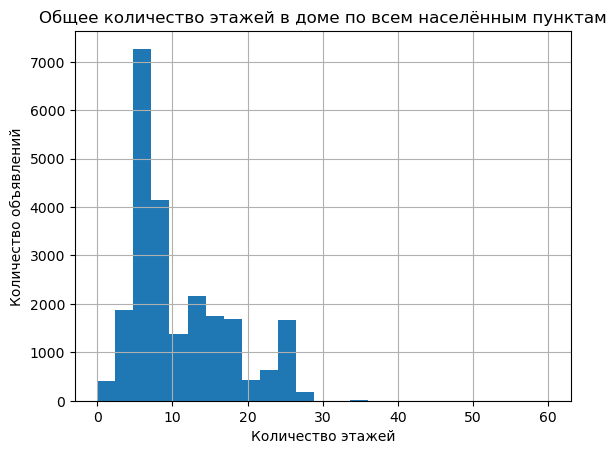

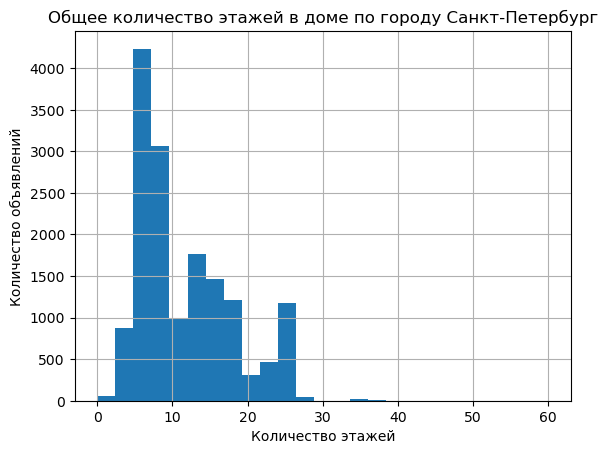

In [184]:
data.hist('floors_total', bins=25, range=(0, 60))
plt.xlabel('Количество этажей')
plt.ylabel('Количество объявлений')
plt.title('Общее количество этажей в доме по всем населённым пунктам')
plt.show()
slice_floor.hist('floors_total', bins=25, range=(0, 60))
plt.xlabel('Количество этажей')
plt.ylabel('Количество объявлений')
plt.title('Общее количество этажей в доме по городу Санкт-Петербург')
plt.show()

Самые высокие здания находятся в Санкт-Петербурге. Гистограммы среза для Санкт-Петербурга и общего датафрейма похожи, на них заметно несколько всплесков, самый значительный приходится 6-7-иэтажные здания.

#### Исследуем параметр "расстояние до центра города в метрах".

In [185]:
city_centers_nonull = data[(data['city_centers_nearest'].notnull())]
city_centers_nonull.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,day_week,month,year,floor_type,city_centers_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51,8,False,False,False,51,0,Санкт-Петербург,18863,16028,1,482,2,755,<NA>,120370,3,3,2019,другой,16
1,7,3350000,40.4,2018-12-04,1,2.65,11,18,1,False,False,False,18,2,посёлок Шушары,12817,18603,0,<NA>,0,<NA>,81,82920,1,12,2018,первый,18
2,10,5196000,56.0,2015-08-20,2,2.65,5,34,4,False,False,False,34,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785,3,8,2015,другой,13
3,0,64900000,159.0,2015-07-24,3,2.65,14,90,9,False,False,False,90,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176,4,7,2015,другой,6
4,2,10000000,100.0,2018-06-19,2,3.03,14,32,13,False,False,False,32,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000,1,6,2018,другой,8


In [186]:
city_centers_nonull.sort_values(by=['city_centers_nearest'], ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,day_week,month,year,floor_type,city_centers_km
9608,8,4200000,51.4,2014-12-10,2,2.55,5,31,2,False,False,False,31,1,посёлок Молодёжное,84869,65968,0,<NA>,0,<NA>,1194,81712,2,12,2014,другой,65
5322,19,3600000,50.6,2019-03-19,2,2.50,5,29,4,False,False,False,29,1,посёлок Молодёжное,84853,65952,0,<NA>,0,<NA>,<NA>,71146,1,3,2019,другой,65
577,7,4000000,59.0,2017-07-23,3,2.50,5,37,1,False,False,False,37,0,посёлок Молодёжное,84665,65764,0,<NA>,0,<NA>,<NA>,67796,6,7,2017,первый,65
20673,1,3300000,43.5,2016-02-16,2,2.55,4,27,2,False,False,False,27,1,посёлок Молодёжное,84006,65105,0,<NA>,0,<NA>,1043,75862,1,2,2016,другой,65
5200,15,3650000,53.8,2018-09-24,3,2.50,4,36,3,False,False,False,36,0,посёлок Молодёжное,83758,64857,0,<NA>,0,<NA>,121,67843,0,9,2018,другой,64
18823,15,3600000,57.6,2019-02-08,3,2.55,3,41,2,False,False,False,41,1,Зеленогорск,81607,62706,0,<NA>,0,<NA>,13,62500,4,2,2019,другой,62
2962,13,3200000,46.3,2018-03-31,2,2.50,3,29,2,False,False,False,29,1,Зеленогорск,81355,62454,0,<NA>,0,<NA>,205,69114,5,3,2018,другой,62
16514,13,3200000,52.8,2017-06-20,2,2.55,5,29,3,False,False,False,29,0,Ломоносов,53042,61495,2,223,0,<NA>,240,60606,1,6,2017,другой,61
23037,0,1800000,32.0,2018-07-17,1,2.65,2,17,1,False,False,False,17,0,Ломоносов,56896,60223,1,17,0,<NA>,147,56250,1,7,2018,первый,60
4425,6,2300000,31.0,2016-05-26,1,2.65,3,12,1,False,False,False,12,0,Зеленогорск,78527,59626,0,<NA>,0,<NA>,232,74193,3,5,2016,первый,59


In [187]:
city_centers_nonull.groupby('locality_name')['city_centers_nearest'].agg(['count','mean'])

,count,mean
locality_name,,
Зеленогорск,24,54617.583333
Колпино,337,32113.771513
Красное Село,176,30020.284091
Кронштадт,95,49195.726316
Ломоносов,132,50739.969697
Мурино,2,21888.0
Павловск,38,33206.921053
Петергоф,201,35468.925373
Пушкин,368,28745.375


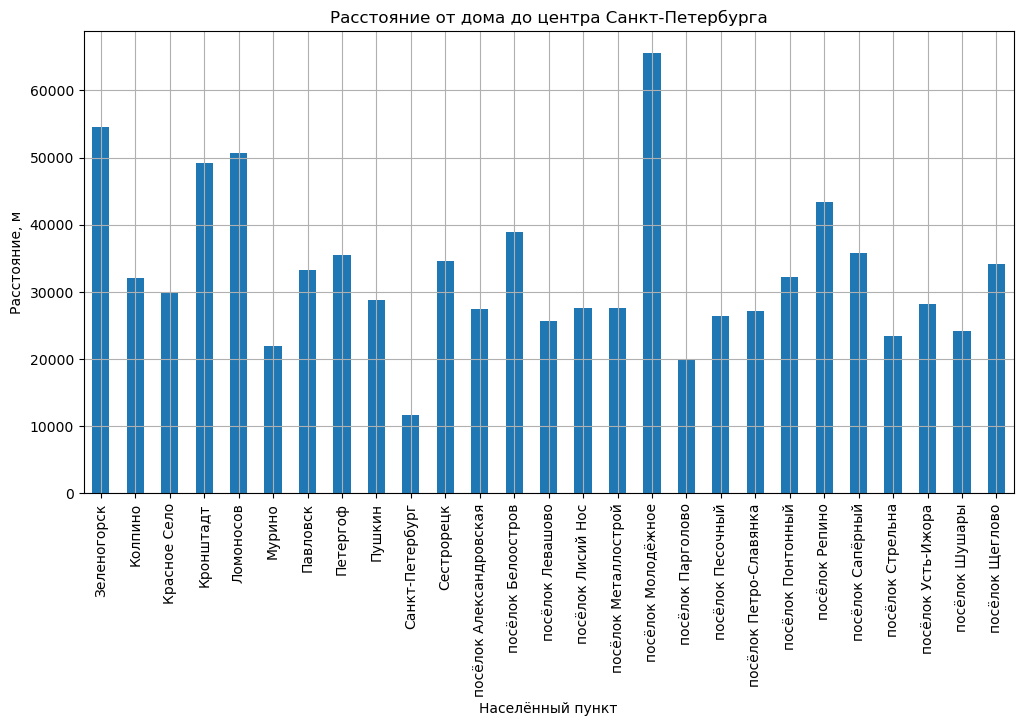

In [188]:
city_centers_nonull.groupby('locality_name')['city_centers_nearest'].mean().plot(kind='bar', grid=True, figsize=(12, 6))
plt.title('Расстояние от дома до центра Санкт-Петербурга')
plt.xlabel('Населённый пункт')
plt.ylabel('Расстояние, м')
plt.show()

Отфильтровав строки с пропущенными значениями в столбце 'city_centers_nearest'- это 23% от общего числа, в которые входят большинство населенных пунктов, но в них и наименьшее количество объявлений. Из осавшихся данных выяснили, что расстояние до центра города - это расстояние до центра Санкт-Петербурга. По полученным данным видно, что на наименьшем расстоянии до центра находятся квартиры в самом Санкт-Петербурге - в среднем 11,5 км, а наибольшее - в посёлке Молодёжное - 65,5 км.

#### Исследуем параметр  "расстояние до ближайшего аэропорта".

In [189]:
airports_nonull = data[(data['airports_nearest'].notnull())]
airports_nonull.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,day_week,month,year,floor_type,city_centers_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51,8,False,False,False,51,0,Санкт-Петербург,18863,16028,1,482,2,755,<NA>,120370,3,3,2019,другой,16
1,7,3350000,40.4,2018-12-04,1,2.65,11,18,1,False,False,False,18,2,посёлок Шушары,12817,18603,0,<NA>,0,<NA>,81,82920,1,12,2018,первый,18
2,10,5196000,56.0,2015-08-20,2,2.65,5,34,4,False,False,False,34,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785,3,8,2015,другой,13
3,0,64900000,159.0,2015-07-24,3,2.65,14,90,9,False,False,False,90,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176,4,7,2015,другой,6
4,2,10000000,100.0,2018-06-19,2,3.03,14,32,13,False,False,False,32,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000,1,6,2018,другой,8


In [190]:
airports_nonull.sort_values(by=['airports_nearest'], ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,day_week,month,year,floor_type,city_centers_km
9608,8,4200000,51.4,2014-12-10,2,2.55,5,31,2,False,False,False,31,1,посёлок Молодёжное,84869,65968,0,<NA>,0,<NA>,1194,81712,2,12,2014,другой,65
5322,19,3600000,50.6,2019-03-19,2,2.50,5,29,4,False,False,False,29,1,посёлок Молодёжное,84853,65952,0,<NA>,0,<NA>,<NA>,71146,1,3,2019,другой,65
577,7,4000000,59.0,2017-07-23,3,2.50,5,37,1,False,False,False,37,0,посёлок Молодёжное,84665,65764,0,<NA>,0,<NA>,<NA>,67796,6,7,2017,первый,65
20673,1,3300000,43.5,2016-02-16,2,2.55,4,27,2,False,False,False,27,1,посёлок Молодёжное,84006,65105,0,<NA>,0,<NA>,1043,75862,1,2,2016,другой,65
5200,15,3650000,53.8,2018-09-24,3,2.50,4,36,3,False,False,False,36,0,посёлок Молодёжное,83758,64857,0,<NA>,0,<NA>,121,67843,0,9,2018,другой,64
18823,15,3600000,57.6,2019-02-08,3,2.55,3,41,2,False,False,False,41,1,Зеленогорск,81607,62706,0,<NA>,0,<NA>,13,62500,4,2,2019,другой,62
2962,13,3200000,46.3,2018-03-31,2,2.50,3,29,2,False,False,False,29,1,Зеленогорск,81355,62454,0,<NA>,0,<NA>,205,69114,5,3,2018,другой,62
4425,6,2300000,31.0,2016-05-26,1,2.65,3,12,1,False,False,False,12,0,Зеленогорск,78527,59626,0,<NA>,0,<NA>,232,74193,3,5,2016,первый,59
938,17,3015000,31.2,2019-04-16,1,2.50,3,17,1,False,False,False,17,0,Зеленогорск,75646,56745,0,<NA>,1,347,<NA>,96634,1,4,2019,первый,56
376,18,8400000,84.0,2018-06-26,2,2.75,3,41,1,False,False,False,41,0,Зеленогорск,73827,54926,0,<NA>,0,<NA>,201,100000,1,6,2018,первый,54


In [191]:
airports_nonull.groupby('locality_name')['airports_nearest'].agg(['count','mean'])

,count,mean
locality_name,,
Зеленогорск,24,73300.25
Колпино,337,26375.863501
Красное Село,176,26595.579545
Кронштадт,95,67469.263158
Ломоносов,132,48308.280303
Мурино,2,51553.0
Павловск,38,21053.342105
Петергоф,201,40184.676617
Пушкин,369,16447.869919


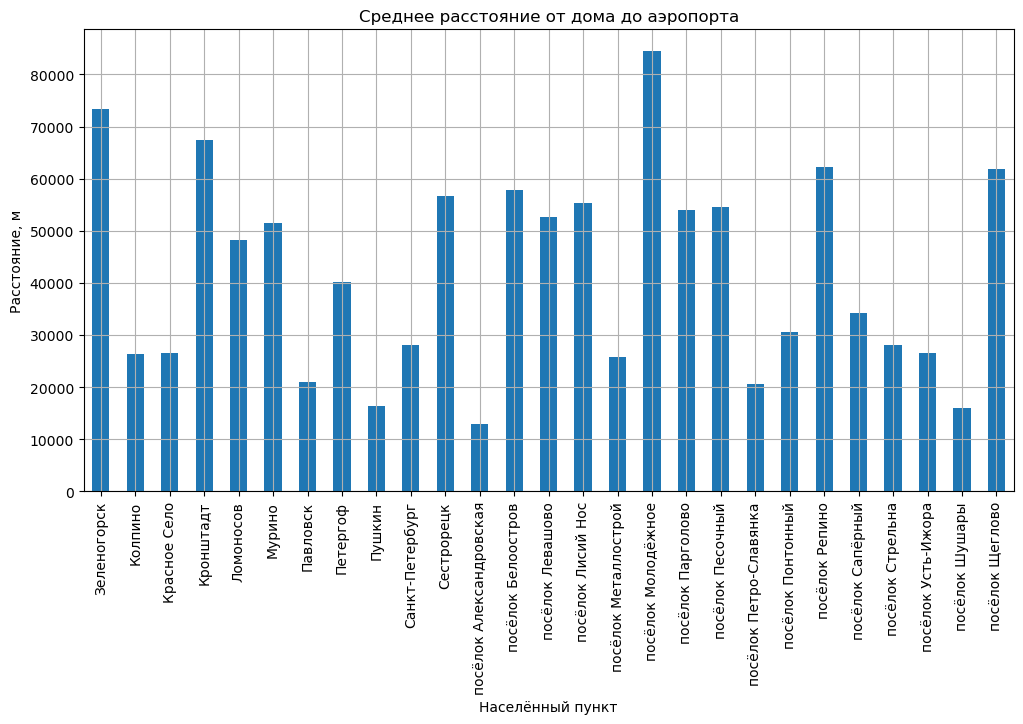

In [192]:
airports_nonull.groupby('locality_name')['airports_nearest'].mean().plot(kind='bar', grid=True, figsize=(12, 6))
plt.title('Среднее расстояние от дома до аэропорта')
plt.xlabel('Населённый пункт')
plt.ylabel('Расстояние, м')
plt.show()

В столбце 'airports_nearest' 23% пропусков. Убрав строки с пропусками получили картину похожую на предыдущий столбец 'city_centers_nearest'. По оставшимся данным построили таблицу и графи, из которых видно, что ближе всего к Аэропроту находится посёлок Александровска (13 км), а дальше всех - посёлок Молодёжное (84 км).

#### Исследуем параметр "расстояние до ближайшего парка".

In [193]:
parks_nonull = data[(data['parks_nearest'].notnull())]
parks_nonull.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,day_week,month,year,floor_type,city_centers_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51,8,False,False,False,51,0,Санкт-Петербург,18863,16028,1,482,2,755,<NA>,120370,3,3,2019,другой,16
2,10,5196000,56.0,2015-08-20,2,2.65,5,34,4,False,False,False,34,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785,3,8,2015,другой,13
3,0,64900000,159.0,2015-07-24,3,2.65,14,90,9,False,False,False,90,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176,4,7,2015,другой,6
4,2,10000000,100.0,2018-06-19,2,3.03,14,32,13,False,False,False,32,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000,1,6,2018,другой,8
10,5,5050000,39.6,2017-11-16,1,2.67,12,20,3,False,False,False,20,0,Санкт-Петербург,38357,13878,1,310,2,553,137,127525,3,11,2017,другой,13


In [194]:
parks_nonull.sort_values(by=['parks_nearest'], ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,day_week,month,year,floor_type,city_centers_km
19366,9,3900000,30.5,2018-02-22,1,2.60,5,16,1,False,False,False,16,0,Санкт-Петербург,14821,9734,0,3190,1,431,176,127868,3,2,2018,первый,9
10925,9,3000000,31.1,2017-03-21,1,2.65,5,17,2,False,False,False,17,0,Санкт-Петербург,14821,9734,0,3190,1,431,234,96463,1,3,2017,другой,9
1584,3,7500000,70.0,2017-07-11,2,2.65,18,37,13,False,False,False,37,0,Санкт-Петербург,14878,9791,0,3064,1,264,4,107142,1,7,2017,другой,9
19144,17,14950000,187.0,2017-10-12,5,3.00,2,80,2,False,False,False,80,1,Санкт-Петербург,36805,8656,0,3013,3,537,49,79946,3,10,2017,последний,8
22994,15,4650000,44.5,2018-02-20,2,2.65,5,25,2,False,False,False,25,1,Санкт-Петербург,14965,9877,1,2984,1,284,152,104494,1,2,2018,другой,9
2647,9,19150000,104.9,2017-08-28,3,3.00,5,61,4,False,False,False,61,1,Санкт-Петербург,36850,9016,1,2905,3,137,91,182554,0,8,2017,другой,9
1854,19,3500000,45.0,2016-12-05,2,2.65,5,29,3,False,False,False,29,1,Санкт-Петербург,15070,9983,1,2888,1,409,473,77777,0,12,2016,другой,9
7828,16,5200000,44.9,2019-03-04,2,2.53,5,29,3,False,False,False,29,1,Санкт-Петербург,15059,9972,1,2880,1,357,<NA>,115812,0,3,2019,другой,9
3851,20,11900000,91.2,2018-10-04,3,3.10,4,62,3,False,False,False,62,0,Санкт-Петербург,36781,8791,1,2847,3,370,<NA>,130482,3,10,2018,другой,8
21922,9,14166000,78.7,2019-04-04,2,2.95,5,38,2,False,False,False,38,1,Санкт-Петербург,37028,8879,1,2768,3,487,9,180000,3,4,2019,другой,8


In [195]:
parks_nonull.groupby('locality_name')['parks_nearest'].agg(['count','mean'])

,count,mean
locality_name,,
Зеленогорск,16,210.625
Колпино,133,495.481203
Красное Село,46,466.086957
Кронштадт,87,324.574713
Ломоносов,16,389.0625
Павловск,26,379.538462
Петергоф,143,419.559441
Пушкин,212,404.29717
Санкт-Петербург,7257,498.940747


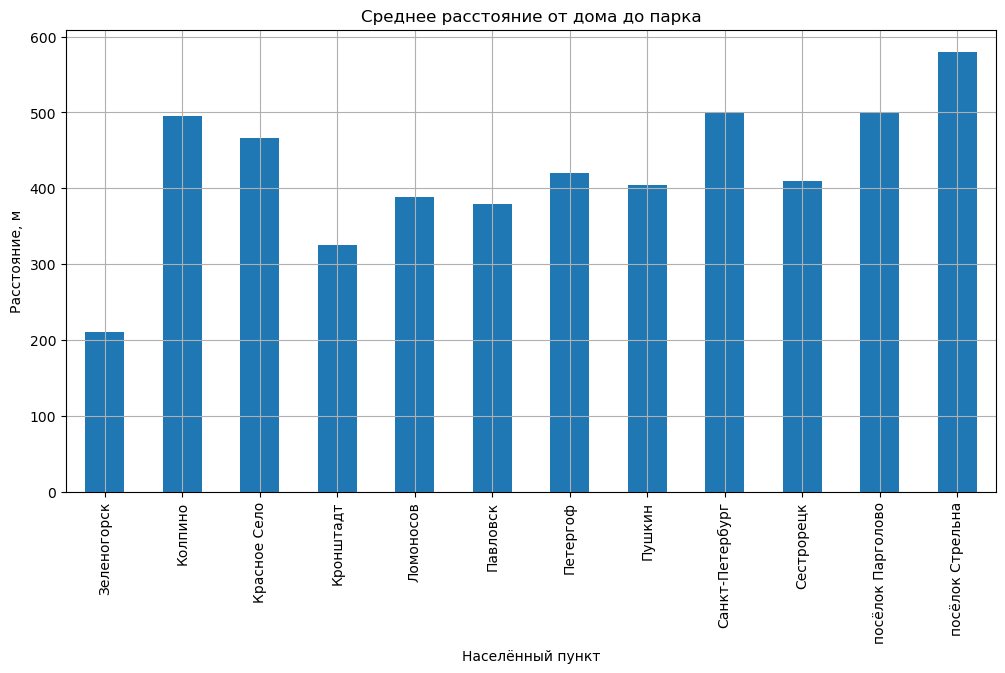

In [196]:
parks_nonull.groupby('locality_name')['parks_nearest'].mean().plot(kind='bar', grid=True, figsize=(12, 6))
plt.title('Среднее расстояние от дома до парка')
plt.xlabel('Населённый пункт')
plt.ylabel('Расстояние, м')
plt.show()

В столбце 'parks_nearest' 66% пропусков. Оставляем для исследования строки, в которых в этом столбце нет пропусков. В таблице осталось всего 12 населённых пунктов из 316. По средним значением для каждого оставшегося населённого пункта строим таблицу и график. Из них видно, что наименьшее соеднее расстояние до парка в Зеленогорске - 210 м, а наибольшее - в посёлке Стрельна - 580 м.

#### Исследуем параметр "день публикации объявления" и "месяц публикации объявления".

In [197]:
data['day_week'].unique()

array([3, 1, 4, 0, 2, 6, 5], dtype=int64)

In [198]:
data['day_week'].value_counts()

3    4280
1    4169
4    3986
2    3958
0    3601
5    1928
6    1690
Name: day_week, dtype: int64

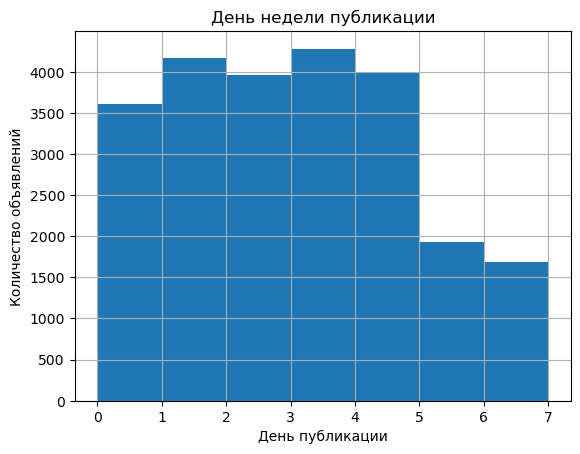

In [199]:
data.hist('day_week', bins=7, range=(0, 7))
plt.xlabel('День публикации')
plt.ylabel('Количество объявлений')
plt.title('День недели публикации')
plt.show()

In [200]:
data['month'].unique()

array([ 3, 12,  8,  7,  6,  9, 11,  4,  5,  2,  1, 10], dtype=int64)

In [201]:
data['month'].value_counts()

2     2637
3     2577
11    2366
4     2365
10    2120
9     1977
6     1753
8     1739
7     1686
12    1636
1     1488
5     1268
Name: month, dtype: int64

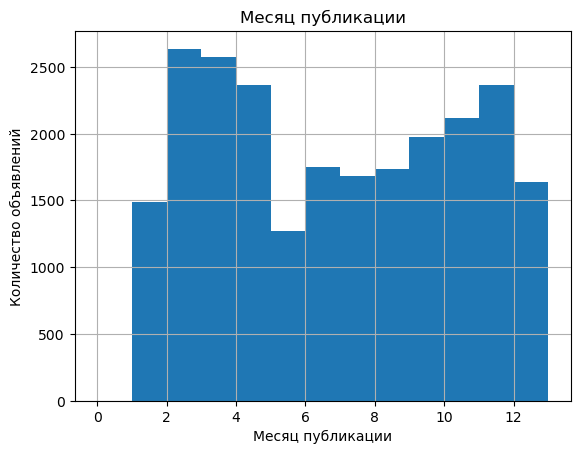

In [202]:
data.hist('month', bins=13, range=(0, 13))
plt.xlabel('Месяц публикации')
plt.ylabel('Количество объявлений')
plt.title('Месяц публикации')
plt.show()

Из таблиц и графиков видно, что наибольшее количество объявлений было размещено в будние дни. По месяцам распределение такое - активное размещение с февраля по апрель, в мае заметное замедление активности, с июня по ноябрь - плавный подъем, а в декабре и январе заметное затишье.

#### Изучаем, как быстро продавались квартиры (столбец days_exposition).

In [203]:
data['days_exposition'].unique()

<IntegerArray>
[<NA>,   81,  558,  424,  121,   55,  155,  189,  289,  137,
 ...
 1032,  993, 1201, 1130, 1052, 1187, 1200, 1360, 1007,  971]
Length: 1141, dtype: Int64

In [204]:
data['days_exposition'].value_counts()

45      878
60      538
7       234
30      208
90      203
       ... 
793       1
1434      1
1231      1
739       1
971       1
Name: days_exposition, Length: 1140, dtype: Int64

In [205]:
data.sort_values(by=['days_exposition'], ascending=False).tail(700)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,day_week,month,year,floor_type,city_centers_km
18476,13,3580000,68.00,2019-03-04,3,2.50,9,40,8,False,False,False,40,0,село Никольское,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,52647,0,3,2019,другой,<NA>
18479,10,6400000,65.50,2019-04-10,3,2.65,9,48,7,False,False,False,48,0,Санкт-Петербург,20129,19131,1,375,2,358,<NA>,97709,2,4,2019,другой,19
18494,15,5800000,40.50,2018-04-03,1,2.75,16,17,2,False,False,False,17,0,Санкт-Петербург,34201,14069,0,<NA>,0,<NA>,<NA>,143209,1,4,2018,другой,14
18498,9,990000,35.50,2018-07-11,1,2.58,5,18,3,False,False,False,18,0,поселок Елизаветино,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,27887,2,7,2018,другой,<NA>
18499,15,4100000,33.60,2019-04-15,1,2.55,16,17,6,False,False,False,17,0,Санкт-Петербург,21297,14515,1,835,2,839,<NA>,122023,0,4,2019,другой,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23597,20,21400000,145.00,2018-11-02,4,3.00,26,71,17,False,False,False,71,0,Санкт-Петербург,11827,11459,0,<NA>,0,<NA>,<NA>,147586,4,11,2018,другой,11
23598,15,2490000,31.00,2019-01-24,1,2.50,5,17,5,False,False,False,17,1,Ломоносов,48393,51818,0,<NA>,0,<NA>,<NA>,80322,3,1,2019,последний,51
23607,9,9700000,133.81,2017-03-21,3,3.70,5,73,3,False,False,False,73,0,Санкт-Петербург,24665,4232,1,796,3,381,<NA>,72490,1,3,2017,другой,4
23609,18,2500000,56.70,2018-02-11,2,2.65,3,29,1,False,False,False,29,0,село Рождествено,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,44091,6,2,2018,первый,<NA>


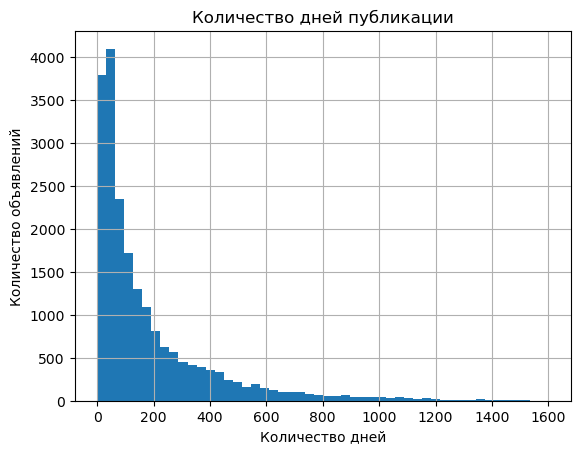

In [206]:
data.hist('days_exposition', bins=50, range=(0, 1600))
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений')
plt.title('Количество дней публикации')
plt.show()

In [207]:
data['days_exposition'].agg(['median','mean'])

median     95.000000
mean      180.513725
Name: days_exposition, dtype: float64

Из таблицы и гистограммы видно, что наибольшее количество продаж происходит за 95 дней. Эта цифра и является медианой. Среднее время продаж - 169 дней. Быстрыми можно считать продажи, выполненные за 7 дней и меньше, их число невелико. Также невелико число продаж дольше 1000 дней, их можно назвать долгими.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен! Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

#### Исследуем факторы, больше всего влияющие на стоимость объекта.

Рассмотрим влияние общей площади на стоимость объекта.

In [208]:
data.groupby('total_area')['last_price'].agg(['count','mean'])

,count,mean
total_area,,
12.0,1,2400000.0
13.0,3,2350000.0
13.2,1,1686000.0
14.0,1,1190000.0
15.0,2,1725000.0
...,...,...
494.1,1,43185328.0
495.0,1,91500000.0
507.0,1,84000000.0


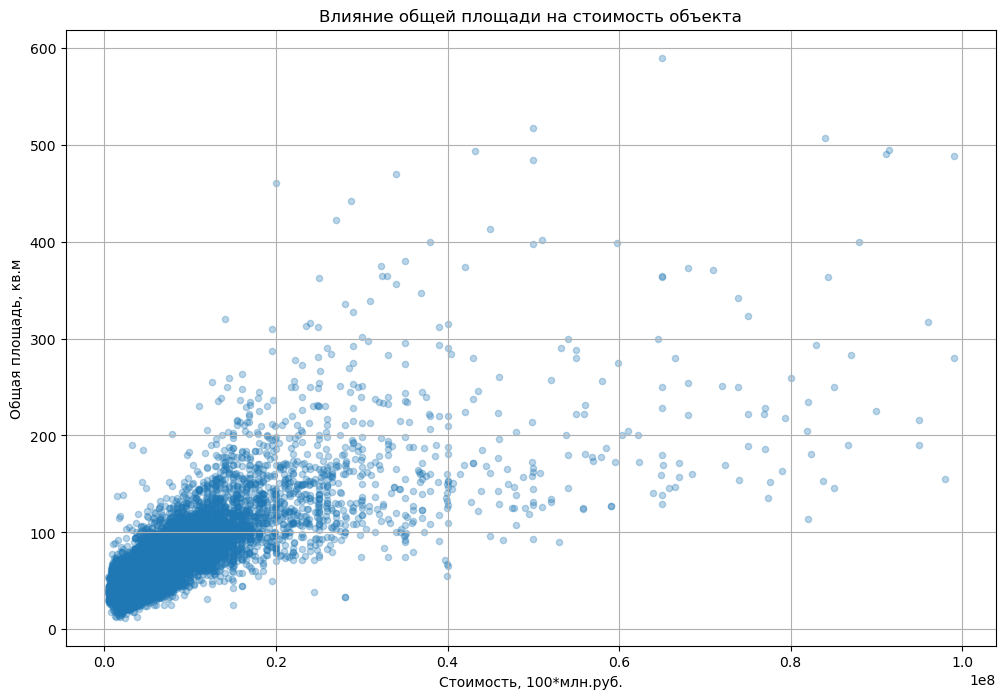

In [209]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3, grid=True, figsize=(12, 8))
plt.title('Влияние общей площади на стоимость объекта')
plt.xlabel('Стоимость, 100*млн.руб.')
plt.ylabel('Общая площадь, кв.м')
plt.show()

Из таблицы и графика видно, что хоть и есть зависимость стоимости от площади есть, но она достаточно размыта, есть и сильно выбивающиеся значения, но они редки.

#### Рассмотрим влияние жилой площади на стоимость объекта.

In [210]:
data.groupby('living_area')['last_price'].agg(['count','mean'])

,count,mean
living_area,,
2,2,4.340000e+06
3,2,3.471500e+07
5,2,4.390000e+06
6,2,3.924500e+06
7,3,1.645333e+06
...,...,...
301,1,8.400000e+07
312,1,4.995000e+07
332,1,5.000000e+07


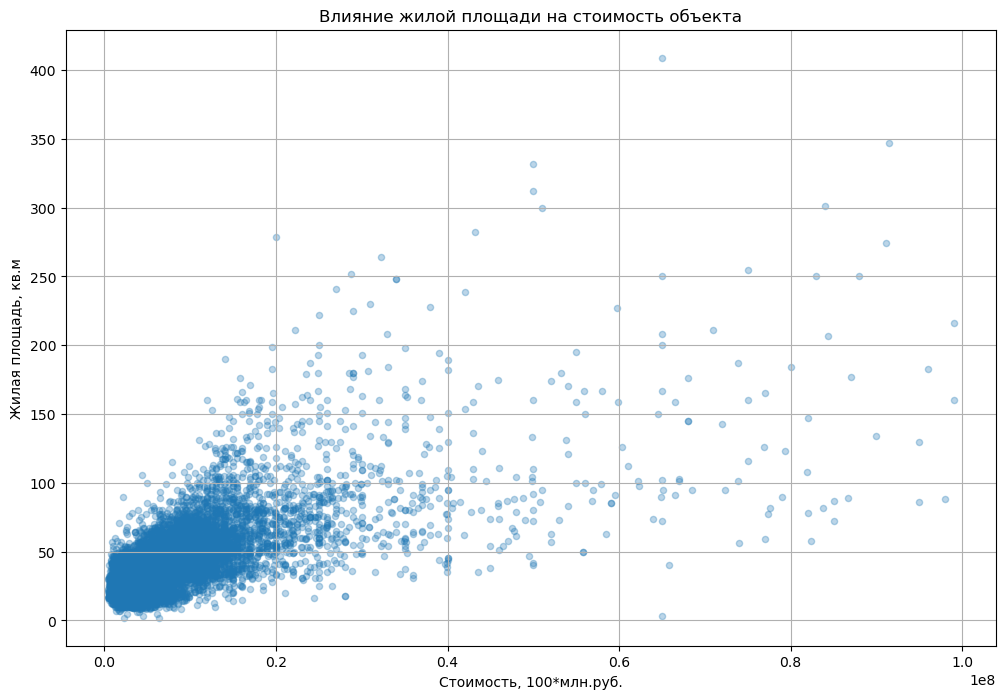

In [211]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3, grid=True, figsize=(12, 8))
plt.title('Влияние жилой площади на стоимость объекта')
plt.xlabel('Стоимость, 100*млн.руб.')
plt.ylabel('Жилая площадь, кв.м')
plt.show()

Этот график очень похож на предыдущий, хотя видно, что зависимость здесь немного меньше.

#### Рассмотрим влияние площади кухни на стоимость объекта.

In [212]:
data.groupby('kitchen_area')['last_price'].agg(['count','mean'])

,count,mean
kitchen_area,,
2,2,4.340000e+06
3,2,3.471500e+07
5,2,4.390000e+06
6,2,3.924500e+06
7,3,1.645333e+06
...,...,...
301,1,8.400000e+07
312,1,4.995000e+07
332,1,5.000000e+07


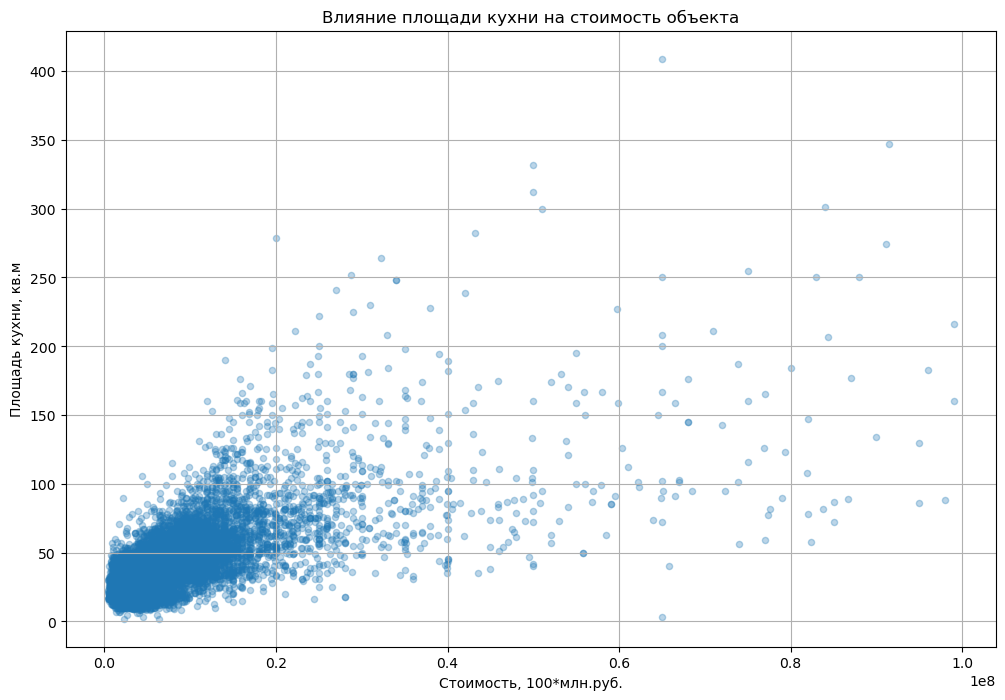

In [213]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3, grid=True, figsize=(12, 8))
plt.title('Влияние площади кухни на стоимость объекта')
plt.xlabel('Стоимость, 100*млн.руб.')
plt.ylabel('Площадь кухни, кв.м')
plt.show()

Площадь кухни еще немного меньше влияет на стоимость объекта. 

#### Рассмотрим влияние количества комнат на стоимость объекта.

In [214]:
data[data['rooms'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,day_week,month,year,floor_type,city_centers_km
144,1,2450000,27.00,2017-03-30,0,2.65,24,15,2,False,True,False,15,2,Мурино,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,181,90740,3,3,2017,другой,<NA>
349,4,2320000,25.00,2017-09-27,0,2.65,14,17,1,False,False,True,17,0,деревня Кудрово,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,45,92800,2,9,2017,первый,<NA>
440,8,2480000,27.11,2018-03-12,0,2.65,17,24,4,False,True,False,24,2,Санкт-Петербург,38171,15015,0,<NA>,2,982,64,91479,0,3,2018,другой,15
508,0,3375000,34.40,2017-03-28,0,2.65,26,24,19,False,False,True,24,1,посёлок Парголово,53115,19292,0,<NA>,1,593,430,98110,1,3,2017,другой,19
608,2,1850000,25.00,2019-02-20,0,2.65,10,14,7,False,True,False,14,0,посёлок Шушары,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,29,74000,2,2,2019,другой,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23124,7,3200000,26.00,2017-09-01,0,2.65,25,18,16,False,True,False,18,0,Санкт-Петербург,11405,13222,0,<NA>,1,623,14,123076,4,9,2017,другой,13
23355,0,2500000,27.70,2017-09-28,0,2.65,24,18,4,False,False,True,18,2,Мурино,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,4,90252,3,9,2017,другой,<NA>
23467,15,3350000,26.00,2018-09-07,0,2.65,19,14,8,False,True,False,14,0,Санкт-Петербург,18090,17092,0,<NA>,2,112,31,128846,4,9,2018,другой,17
23505,10,1450000,29.00,2017-11-11,0,2.65,9,18,8,False,False,True,18,2,село Никольское,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,82,50000,5,11,2017,другой,<NA>


In [215]:
data.groupby('rooms')['last_price'].agg(['count','mean'])

,count,mean
rooms,,
0,197,3.337724e+06
1,8036,3.834080e+06
2,7922,5.555527e+06
3,5793,8.053170e+06
4,1166,1.248852e+07
5,316,1.935244e+07
6,100,2.366524e+07
7,54,2.895804e+07
8,10,2.726900e+07


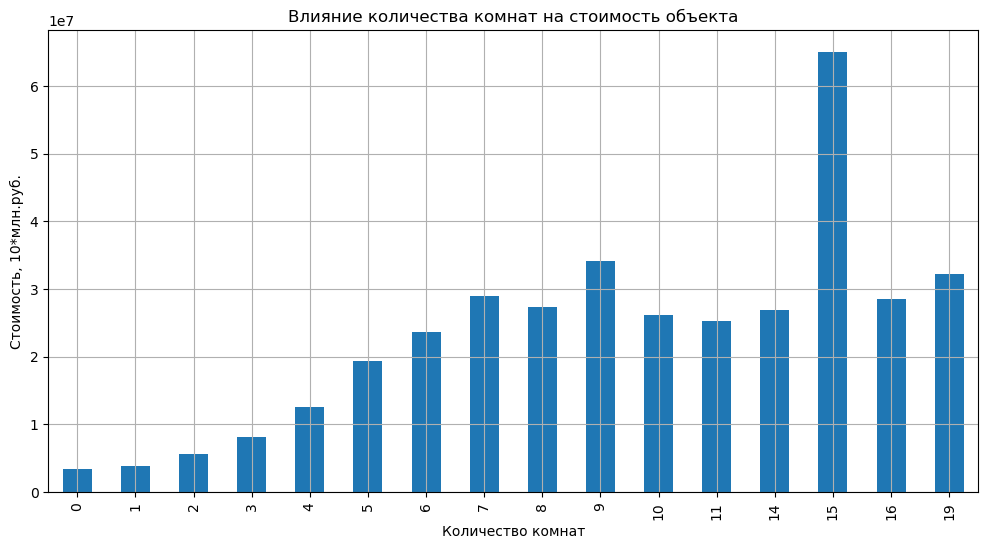

In [216]:
data.groupby('rooms')['last_price'].mean().plot(kind='bar', grid=True, figsize=(12, 6))
plt.title('Влияние количества комнат на стоимость объекта')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость, 10*млн.руб.')
plt.show()

Количество комнат напрямую влияет на стоимость квартиры - чем больше комнат, тем выше стоимость. Это справедливо для квартир, включающих до семи комнат. Остальных квартир немного, и стоимость у них не сильно отличается. Немного дороже девятикомнатные квартиры (их всего восемь) и 15-икомнатная квартира, котрая выделяется двухратным размером стоимости от самых дорогих квартир. Квартиры с нулевым количеством комнат - это квартиры-студии и квартиры со свободной планировкой, находятся в одном ценовом сигменте с однокомнатными квартирами.

In [217]:
cor = data.pivot_table(index='locality_name', values=['last_price', 'total_area', 
                                                      'living_area', 'kitchen_area', 'rooms'], aggfunc='mean')
cor.corr()

,kitchen_area,last_price,living_area,rooms,total_area
kitchen_area,1.000000,0.527762,1.000000,0.809561,0.934736
last_price,0.527762,1.000000,0.527762,0.241739,0.612665
living_area,1.000000,0.527762,1.000000,0.809561,0.934736
rooms,0.809561,0.241739,0.809561,1.000000,0.737709
total_area,0.934736,0.612665,0.934736,0.737709,1.000000


#### Рассмотрим влияние типа этажа, на котором расположена квартира на стоимость объекта.

In [218]:
data.groupby('floor_type')['last_price'].agg(['count','mean'])

,count,mean
floor_type,,
другой,17304,6.478692e+06
первый,2911,4.755738e+06
последний,3397,6.370741e+06


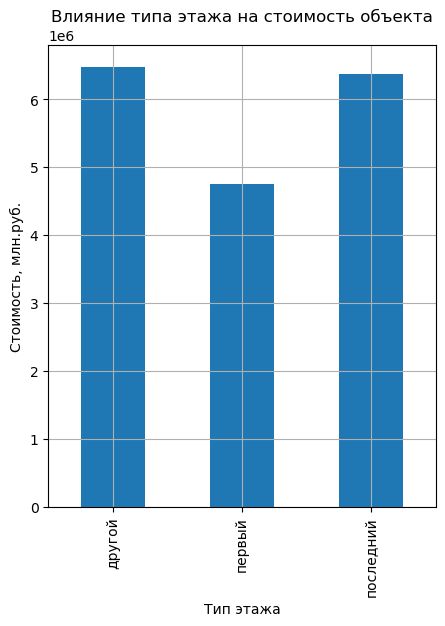

In [219]:
data.groupby('floor_type')['last_price'].mean().plot(kind='bar', grid=True, figsize=(5, 6))
plt.title('Влияние типа этажа на стоимость объекта')
plt.xlabel('Тип этажа')
plt.ylabel('Стоимость, млн.руб.')
plt.show()

Самые дешевые квартиры располагаются на первом этаже, они на 25% дешевле остальных. Квартиры, расположенные на последнем этаже лишь совсем немного уступают в стоимости остальным квартирам.

#### Рассмотрим влияние даты размещения (день недели, месяц, год) на стоимость объекта.

In [220]:
data.groupby('day_week')['last_price'].agg(['count','mean'])

,count,mean
day_week,,
0,3601,6.254929e+06
1,4169,6.170257e+06
2,3958,6.233541e+06
3,4280,6.535817e+06
4,3986,6.157139e+06
5,1928,6.135069e+06
6,1690,6.111495e+06


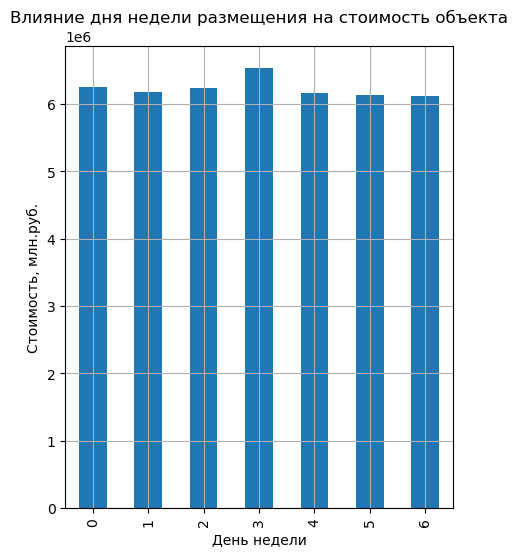

In [221]:
data.groupby('day_week')['last_price'].mean().plot(kind='bar', grid=True, figsize=(5, 6))
plt.title('Влияние дня недели размещения на стоимость объекта')
plt.xlabel('День недели')
plt.ylabel('Стоимость, млн.руб.')
plt.show()

День недели практически не влияет на стоимость объекта, лишь четверг имеет немного лучшие показатели.

In [222]:
data.groupby('month')['last_price'].agg(['count','mean'])

,count,mean
month,,
1,1488,6.374637e+06
2,2637,6.265991e+06
3,2577,6.077197e+06
4,2365,6.139056e+06
5,1268,6.317324e+06
6,1753,6.180062e+06
7,1686,6.355029e+06
8,1739,6.125539e+06
9,1977,6.383178e+06


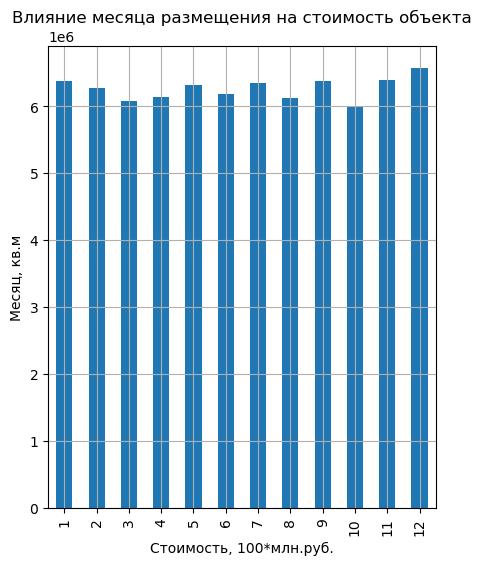

In [223]:
data.groupby('month')['last_price'].mean().plot(kind='bar', grid=True, figsize=(5, 6))
plt.title('Влияние месяца размещения на стоимость объекта')
plt.xlabel('Стоимость, 100*млн.руб.')
plt.ylabel('Месяц, кв.м')
plt.show()

Месяц тоже несильно влияет на стоимость квартиры. Лишь в октябре квартиры на 5% дешевле средних значений, а в декабпе на 5% дороже.

In [224]:
data.groupby('year')['last_price'].agg(['count','mean'])

,count,mean
year,,
2014,136,1.204660e+07
2015,1167,7.896021e+06
2016,2758,6.384221e+06
2017,8171,6.200277e+06
2018,8506,5.836735e+06
2019,2874,6.549146e+06


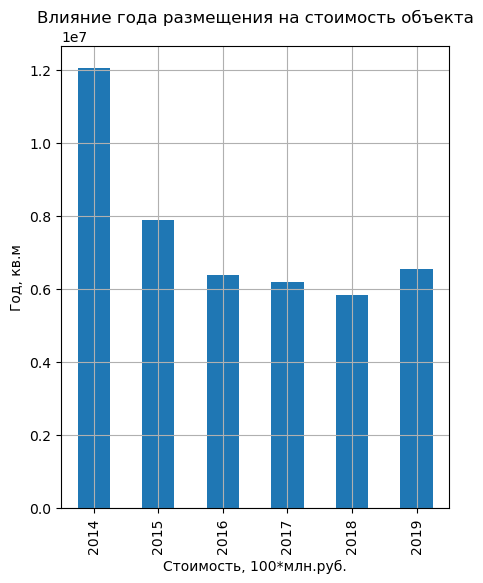

In [225]:
data.groupby('year')['last_price'].mean().plot(kind='bar', grid=True, figsize=(5, 6))
plt.title('Влияние года размещения на стоимость объекта')
plt.xlabel('Стоимость, 100*млн.руб.')
plt.ylabel('Год, кв.м')
plt.show()

Влияние года размещения на стоимость объекта довольно существенно. Самые высокие показатели были в 2014 году. В 2015 стоимость упала на 35%, в 2016 снизилась еще на 20%, в следующие два года еще немного снижалась, а в 2019 поднялась на 10%, превысив показатели 2016 года.

Вывод: наибольшее влияние на стоимость квартиры оказывают год размещения объявления, количество комнат. Меньше стоимость у квартир на первом этаже. Общая, жилая площадь и площадь кухни не имеют выраженного прямого влияния на стоимость. 

#### Считаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [226]:
data['m_price'] = data['last_price'] / data['total_area']

In [227]:
metr_price = data.pivot_table(index='locality_name', values=['m_price'], aggfunc=['count', 'mean']).reset_index()
metr_price.columns = ['Населённый пункт', 'кол-во', 'руб/м2']
metr_price = metr_price.sort_values('кол-во',ascending=False)[:10]
metr_price.sort_values('руб/м2',ascending=False)

,Населённый пункт,кол-во,руб/м2
32,Санкт-Петербург,15683,113604.178634
31,Пушкин,369,103125.819291
84,деревня Кудрово,299,92473.547576
264,посёлок Парголово,327,90175.913458
22,Мурино,590,86087.512050
290,посёлок Шушары,440,78677.364217
13,Колпино,338,75424.579098
6,Гатчина,307,68746.146763
3,Всеволожск,398,68654.473986
4,Выборг,237,58141.909153


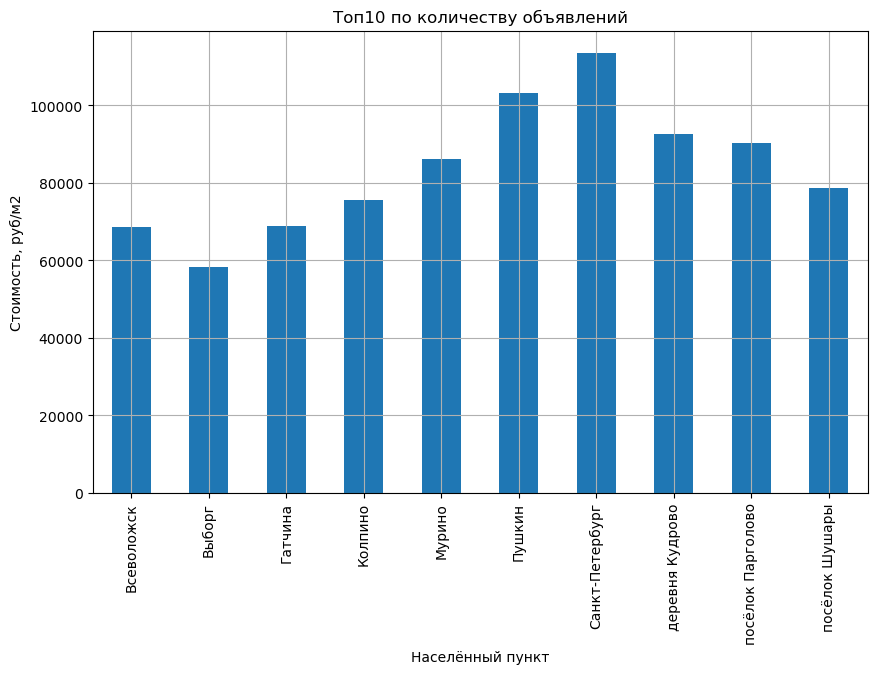

In [228]:
metr_price.groupby('Населённый пункт')['руб/м2'].mean().plot(kind='bar', grid=True, figsize=(10, 6))
plt.title('Топ10 по количеству объявлений')
plt.xlabel('Населённый пункт')
plt.ylabel('Стоимость, руб/м2')
plt.show()

Из десяти населённых пунктов, в которых зарегистрировано наибольшее число объявлений, наибольшая стоимость м2 в Санкт-Петербурге - 113604 руб/м2, а наименьшая - в Выборге - 58142 руб/м2.

#### Расчёт зависимости стоимости объектов от расстояния до центра города.

In [229]:
data['km_price'] = data['last_price'] / data['total_area']   

In [230]:
k_metr_price = data.pivot_table(index=['locality_name','city_centers_km'] , values=['km_price'], 
                                aggfunc=['count', 'mean']).reset_index()
k_metr_price.columns = ['Населённый пункт', 'км до центра', 'кол-во', 'руб/м2'] 
k_metr_price.loc[k_metr_price['Населённый пункт'] == 'Санкт-Петербург']

,Населённый пункт,км до центра,кол-во,руб/м2
68,Санкт-Петербург,0,84,176665.482523
69,Санкт-Петербург,1,235,147469.162192
70,Санкт-Петербург,2,303,139630.221236
71,Санкт-Петербург,3,522,123539.707694
72,Санкт-Петербург,4,901,136016.587777
73,Санкт-Петербург,5,761,142254.564140
74,Санкт-Петербург,6,467,149907.945700
75,Санкт-Петербург,7,403,137322.984423
76,Санкт-Петербург,8,670,120581.349830
77,Санкт-Петербург,9,689,110172.057254


Из таблицы видно, что цена за квадратный метр объекта тем выше, чем ближе к центру города.

### Общий вывод

По данным из предоставленного для анализа архива объявлений о продаже квартир были прорведены исследования всех данных из таблицы, очистка и исправление данных,  поиск определённых зависимостей и особенностей. <br />
По результатам проведённого иследования были выявлены некоторые особенности и зависимости на рынке недвижимости - продажи квартир в Санкт-Петербурге и окресностях. <br />
На рынке представлены квартиры широкой ценовой категории, имеющие большой диапазон по площади, месте нахождения, количеству комнат и пр.<br />
Общая стоимость квартир складывается в зависимости от следующих параметров. Сильно влияет на стоимость отдаленность квартиры от центра Санкт-Петербурга, площади квартиры, этажа расположения квартиры, количества комнат. Сильное влияние на стоимость оказывает год размещения объявления, тогда как день недели и месяц не имеют особенного влияния на стоимость.<br /> Самые высокие здания находятся В Санкт-Петербурге, здесь же и квартиры с наибольшим количеством комнат.
<br /> Среднее время продажи квартиры составляет около полугода, однако большинство квартир продаются через три месяца после размещения объявления. Есть и сверхбыстрые продажи - 1 - 7 дней, и очень долгие - почти до пяти лет.